In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import ConvexHull
import geopandas as gpd
import contextily as ctx


In [2]:
# Load the dataset
data = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx")
data1 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet 1")


In [3]:
# Display the first few rows of the dataset to ensure it's loaded correctly
print(data.head())

# Display the column names
print(data.columns)


   Period     YEAR MONTH     STANDARD ICB SUB LOCATION ORG CODE  \
0  MAY-23  2023/24   MAY          2WW                       00L   
1  MAY-23  2023/24   MAY  28 Days FDS                       00L   
2  JUN-23  2023/24   JUN          2WW                       00L   
3  JUN-23  2023/24   JUN  28 Days FDS                       00L   
4  APR-23  2023/24   APR          2WW                       00L   

   TOTAL TREATED  WITHIN STANDARD  BREACHES  Unnamed: 8  Unnamed: 9  \
0           1492             1399        93         NaN         NaN   
1           1486             1189       297         NaN         NaN   
2           1456             1351       105         NaN         NaN   
3           1441             1117       324         NaN         NaN   
4           1262             1119       143         NaN         NaN   

     Unnamed: 10  Unnamed: 11  
0            NaN          NaN  
1            NaN          NaN  
2            NaN          NaN  
3  Non-Compliant         76.0  
4         

In [9]:
# Print unique values in the 'Period' column
print(data['Period'].unique())


['MAY-23' 'JUN-23' 'APR-23']


In [25]:
data = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx")
data2 = pd.read_excel("Sub_ICB_Locations_(April_2023)_Names_and_Codes_in_England.csv")

# Merge the datasets based on the ICB Sub Location Org Code
merged_data = pd.merge(data, data2, left_on='ICB SUB LOCATION ORG CODE', right_on='SICBL23CDH', how='left')

# Print the merged data to check
print(merged_data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'Sub_ICB_Locations_(April_2023)_Names_and_Codes_in_England.csv'

In [5]:
# Group by 'ICB SUB LOCATION ORG CODE' to get the sum of 'TOTAL TREATED', 'WITHIN STANDARD', and 'BREACHES' for each location
grouped_data = data.groupby('ICB SUB LOCATION ORG CODE').agg({
    'TOTAL TREATED': 'sum',
    'WITHIN STANDARD': 'sum',
    'BREACHES': 'sum'
}).reset_index()

# Calculate the percentage of patients treated within the standard for each location
grouped_data['Percentage Within Standard'] = (grouped_data['WITHIN STANDARD'] / grouped_data['TOTAL TREATED']) * 100

# Sort the data by 'Percentage Within Standard' to identify the best and worst performing locations
sorted_data = grouped_data.sort_values(by='Percentage Within Standard', ascending=False)

# Display the top 5 locations with the highest percentage of patients treated within the standard
print("Top 5 Locations with Highest Percentage Within Standard:")
print(sorted_data.head())

# Display the bottom 5 locations with the lowest percentage of patients treated within the standard
print("\nBottom 5 Locations with Lowest Percentage Within Standard:")
print(sorted_data.tail())


Top 5 Locations with Highest Percentage Within Standard:
    ICB SUB LOCATION ORG CODE  TOTAL TREATED  WITHIN STANDARD  BREACHES  \
61                        11M          16830            14795      2035   
2                         00P           8807             7716      1091   
29                        02T           6225             5363       862   
114                     X2C4Y          12558            10786      1772   
38                        03R          12491            10713      1778   

     Percentage Within Standard  
61                    87.908497  
2                     87.612127  
29                    86.152610  
114                   85.889473  
38                    85.765751  

Bottom 5 Locations with Lowest Percentage Within Standard:
   ICB SUB LOCATION ORG CODE  TOTAL TREATED  WITHIN STANDARD  BREACHES  \
71                       14T             65               38        27   
83                       32T             81               47        34   
99    

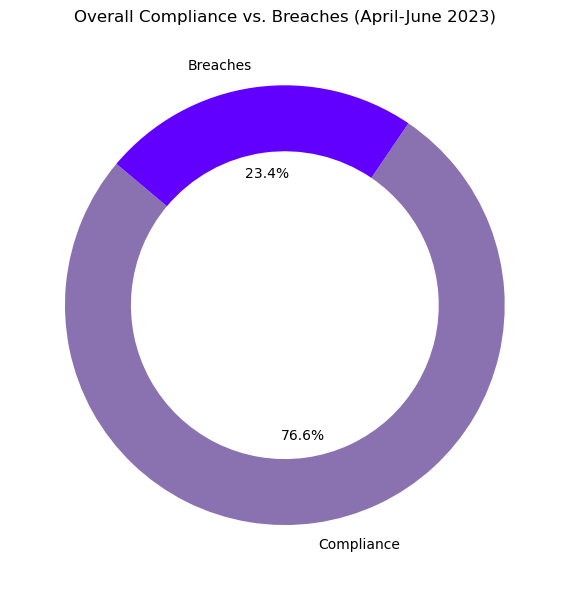

In [10]:
#Overall compliance

# Load the data
data1 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet 1")

# Filter data for the months of April, May, and June
filtered_data = data1[data1['Period'].isin(['APR-23', 'MAY-23', 'JUN-23'])]

# Calculate overall compliance and breaches for the entire period
total_compliance = filtered_data['WITHIN STANDARD'].sum()
total_breaches = filtered_data['BREACHES'].sum()

# Data for the doughnut chart
sizes = [total_compliance, total_breaches]
labels = ['Compliance', 'Breaches']
colors = ['#8A72B0', '#6200FF']

# Plotting
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Overall Compliance vs. Breaches (April-June 2023)')
plt.tight_layout()
plt.show()



Period
APR-23    76.355041
JUN-23    77.013500
MAY-23    76.056347
Name: Compliance Rate, dtype: float64


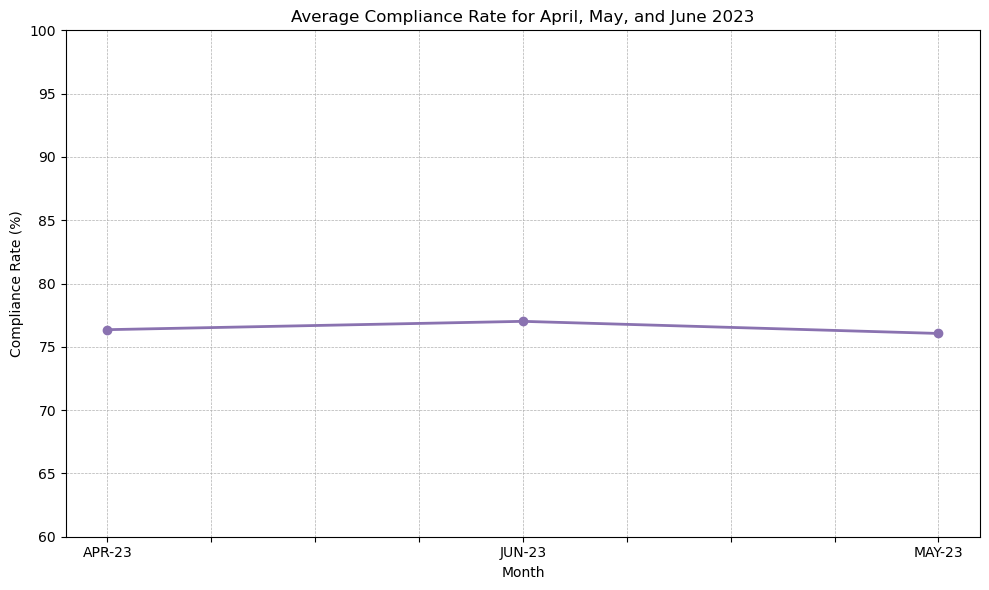

In [12]:
#Average Compliance

# Filter data for the months of April, May, and June
filtered_data = data1[data1['Period'].isin(['APR-23', 'MAY-23', 'JUN-23'])]

# Calculate overall compliance for each month
filtered_data['Compliance Rate'] = filtered_data['WITHIN STANDARD'] / filtered_data['TOTAL TREATED'] * 100

# Group by month and calculate the average compliance rate
average_compliance = filtered_data.groupby('Period')['Compliance Rate'].mean()

print(average_compliance)

# Plotting
plt.figure(figsize=(10, 6))
average_compliance.plot(marker='o', color='#8A72B0', linestyle='-', linewidth=2)
plt.title('Average Compliance Rate for April, May, and June 2023')
plt.ylabel('Compliance Rate (%)')
plt.xlabel('Month')
plt.ylim(60, 100)  # Adjusting the y-axis range
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass'

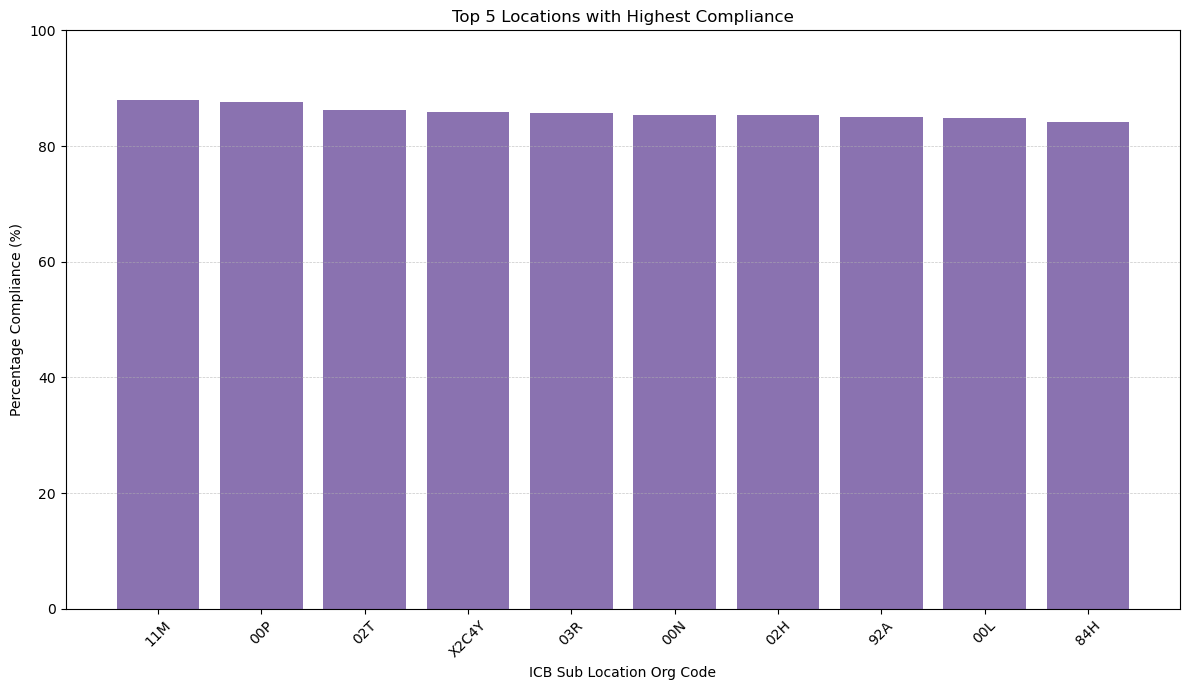

    ICB SUB LOCATION ORG CODE  Percentage Compliance
61                        11M              87.908497
2                         00P              87.612127
29                        02T              86.152610
114                     X2C4Y              85.889473
38                        03R              85.765751
1                         00N              85.378645
25                        02H              85.313175
95                        92A              84.969846
0                         00L              84.856536
93                        84H              84.235137


In [29]:
# Calculate 'Percentage Compliance' for each location
grouped_data['Percentage Compliance'] = (grouped_data['WITHIN STANDARD'] / grouped_data['TOTAL TREATED']) * 100

# Top 5 Locations with Highest Compliance

# Sort the data by 'Percentage Compliance' and select the top 10 locations
top_5_locations = grouped_data.sort_values(by='Percentage Compliance', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 7))
plt.bar(top_5_locations['ICB SUB LOCATION ORG CODE'], top_5_locations['Percentage Compliance'], color='#8A72B0')
plt.xlabel('ICB Sub Location Org Code')
plt.ylabel('Percentage Compliance (%)')
plt.title('Top 5 Locations with Highest Compliance')
plt.ylim(0, 100)  # Set y-axis limits to range from 0 to 100 for clarity
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# Display the top 5 locations with their ICB SUB LOCATION ORG CODE and Percentage Compliance
columns_to_display = ['ICB SUB LOCATION ORG CODE', 'Percentage Compliance']
print(top_5_locations[columns_to_display])




findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass'

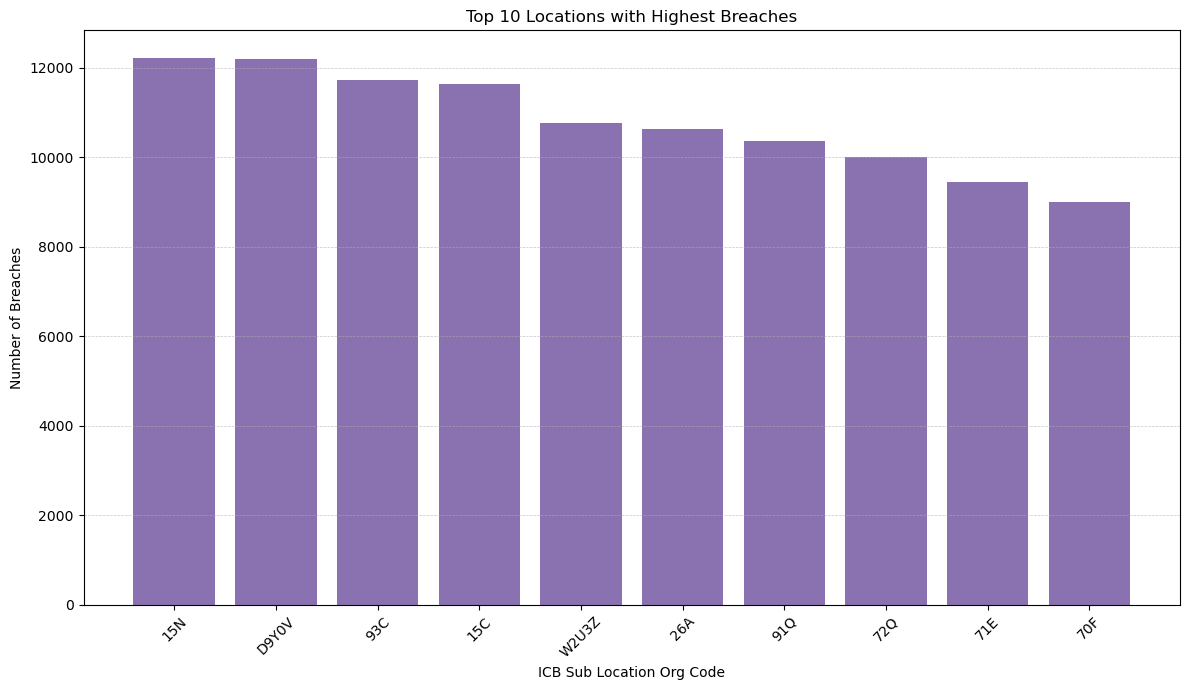

    ICB SUB LOCATION ORG CODE  BREACHES
78                        15N     12228
109                     D9Y0V     12205
97                        93C     11740
74                        15C     11637
113                     W2U3Z     10757
81                        26A     10630
94                        91Q     10364
90                        72Q     10000
89                        71E      9459
88                        70F      9006


In [41]:
#Top 10 Locations with Highest Breaches

# Set the font to "Overpass"
plt.rcParams['font.family'] = 'Overpass'

# Sort the data by 'BREACHES' and select the top 10 locations
top_10_breaches = grouped_data.sort_values(by='BREACHES', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 7))
plt.bar(top_10_breaches['ICB SUB LOCATION ORG CODE'], top_10_breaches['BREACHES'], color='#8A72B0')
plt.xlabel('ICB Sub Location Org Code')
plt.ylabel('Number of Breaches')
plt.title('Top 10 Locations with Highest Breaches')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# Display the top 10 locations with their ICB SUB LOCATION ORG CODE and number of breaches
columns_to_display = ['ICB SUB LOCATION ORG CODE', 'BREACHES']
display_table = top_10_breaches[columns_to_display]

# Print the table
print(display_table)




   Period  RoC WITHIN STANDARD  RoC BREACHES
0  APR-23             0.000000      0.000000
1  JUN-23            23.679791      9.693841
2  MAY-23            -6.313625     -1.100701


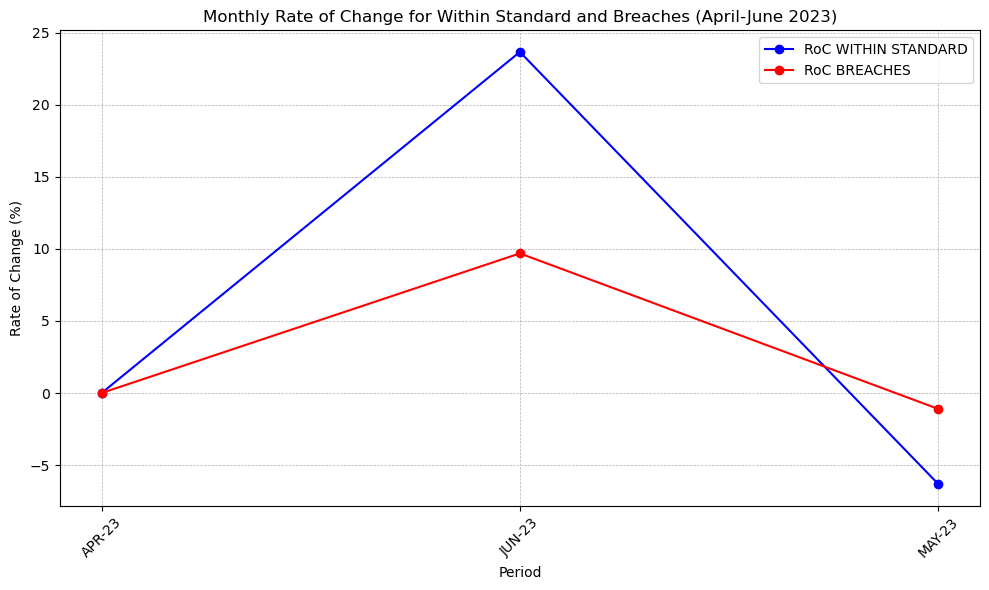

In [15]:

#Rate of Change
import pandas as pd
import matplotlib.pyplot as plt

# Sort the data by 'Period' to ensure it's in chronological order
monthly_data = monthly_data.sort_values(by='Period')

# Calculate the rate of change for 'WITHIN STANDARD' and 'BREACHES'
# We'll manually set the rate of change for April to 0 since it's our starting point
monthly_data['RoC WITHIN STANDARD'] = [0] + [(monthly_data['WITHIN STANDARD'].iloc[i] - monthly_data['WITHIN STANDARD'].iloc[i-1]) / monthly_data['WITHIN STANDARD'].iloc[i-1] * 100 for i in range(1, len(monthly_data))]
monthly_data['RoC BREACHES'] = [0] + [(monthly_data['BREACHES'].iloc[i] - monthly_data['BREACHES'].iloc[i-1]) / monthly_data['BREACHES'].iloc[i-1] * 100 for i in range(1, len(monthly_data))]

# Filter the data for the months April 2023 to June 2023
filtered_data = monthly_data[monthly_data['Period'].isin(['APR-23', 'MAY-23', 'JUN-23'])]

# Display the rate of change for each month in the filtered data
print(filtered_data[['Period', 'RoC WITHIN STANDARD', 'RoC BREACHES']])

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the rate of change for 'WITHIN STANDARD' using the filtered data
ax.plot(filtered_data['Period'], filtered_data['RoC WITHIN STANDARD'], marker='o', label='RoC WITHIN STANDARD', color='blue')

# Plot the rate of change for 'BREACHES' using the filtered data
ax.plot(filtered_data['Period'], filtered_data['RoC BREACHES'], marker='o', label='RoC BREACHES', color='red')

# Set the title and labels
ax.set_title('Monthly Rate of Change for Within Standard and Breaches (April-June 2023)')
ax.set_xlabel('Period')
ax.set_ylabel('Rate of Change (%)')
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()






   Period  RoC WITHIN STANDARD  RoC BREACHES
0  APR-23             0.000000      0.000000
2  MAY-23            15.871112      8.486440
1  JUN-23             6.739107      1.112951


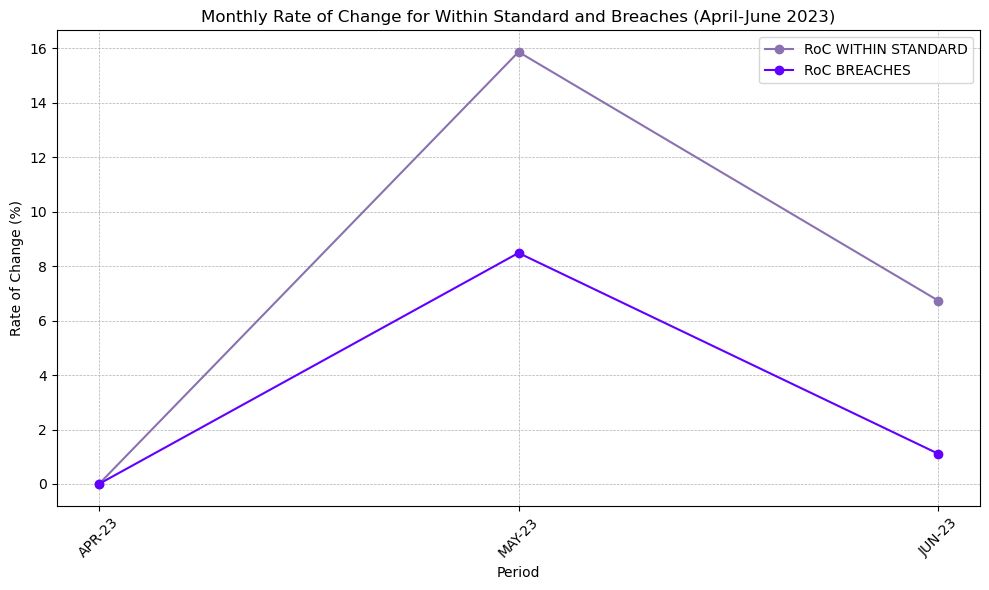

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a custom order for the months
month_order = ['APR-23', 'MAY-23', 'JUN-23']

# Sort the data by 'Period' to ensure it's in chronological order
monthly_data['Period'] = pd.Categorical(monthly_data['Period'], categories=month_order, ordered=True)
monthly_data = monthly_data.sort_values(by='Period')

# Calculate the rate of change for 'WITHIN STANDARD' and 'BREACHES'
# We'll manually set the rate of change for April to 0 since it's our starting point
monthly_data['RoC WITHIN STANDARD'] = [0] + [(monthly_data['WITHIN STANDARD'].iloc[i] - monthly_data['WITHIN STANDARD'].iloc[i-1]) / monthly_data['WITHIN STANDARD'].iloc[i-1] * 100 for i in range(1, len(monthly_data))]
monthly_data['RoC BREACHES'] = [0] + [(monthly_data['BREACHES'].iloc[i] - monthly_data['BREACHES'].iloc[i-1]) / monthly_data['BREACHES'].iloc[i-1] * 100 for i in range(1, len(monthly_data))]

# Filter the data for the months April 2023 to June 2023
filtered_data = monthly_data[monthly_data['Period'].isin(['APR-23', 'MAY-23', 'JUN-23'])]

# Display the rate of change for each month in the filtered data
print(filtered_data[['Period', 'RoC WITHIN STANDARD', 'RoC BREACHES']])

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the rate of change for 'WITHIN STANDARD' using the filtered data
ax.plot(filtered_data['Period'], filtered_data['RoC WITHIN STANDARD'], marker='o', label='RoC WITHIN STANDARD', color='#8A72B0')

# Plot the rate of change for 'BREACHES' using the filtered data
ax.plot(filtered_data['Period'], filtered_data['RoC BREACHES'], marker='o', label='RoC BREACHES', color='#6200FF')

# Set the title and labels
ax.set_title('Monthly Rate of Change for Within Standard and Breaches (April-June 2023)')
ax.set_xlabel('Period')
ax.set_ylabel('Rate of Change (%)')
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

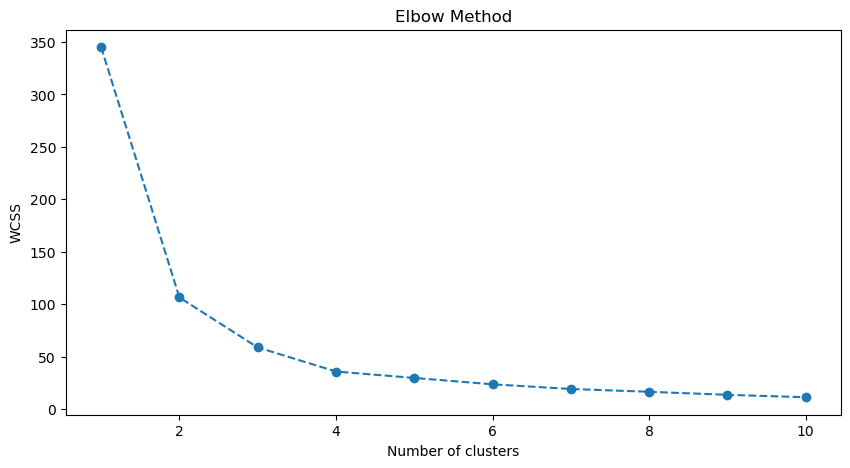

/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyError: 'Total Treated'

<Figure size 1000x600 with 0 Axes>

In [25]:
#CLUSTERING

# Group by 'ICB SUB LOCATION ORG CODE' to get the sum of 'TOTAL TREATED', 'WITHIN STANDARD', and 'BREACHES' for each location
grouped_data = data.groupby('ICB SUB LOCATION ORG CODE').agg({
    'TOTAL TREATED': 'sum',
    'WITHIN STANDARD': 'sum',
    'BREACHES': 'sum'
}).reset_index()

# Extract the columns for clustering and normalize the data
X = grouped_data[['TOTAL TREATED', 'WITHIN STANDARD', 'BREACHES']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow plot, choose an optimal number of clusters (let's assume it's 3 for this example)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
grouped_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Define shades of #8A72B0
shades = ['#8A72B0', '#6200FF', '#26183E']

# Visualize the clusters using a scatter plot (using 'TOTAL TREATED' and 'BREACHES' for visualization)
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.scatter(grouped_data[grouped_data['Cluster'] == i]['Total Treated'], 
                grouped_data[grouped_data['Cluster'] == i]['Breaches'], 
                color=shades[i], 
                label=f'Cluster {i}')

# The following line that plots the centroids has been removed
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X', label='Centroids')

plt.title('Clusters of ICB Sub Locations')
plt.xlabel('TOTAL TREATED')
plt.ylabel('BREACHES')
plt.legend()
plt.show()


In [10]:
# Display the ICB sub-locations and their respective clusters
print(grouped_data[['ICB SUB LOCATION ORG CODE', 'Cluster']])

# Provide summary statistics for each cluster
cluster_summary = grouped_data.groupby('Cluster').agg({
    'TOTAL TREATED': ['mean', 'std', 'min', 'max'],
    'WITHIN STANDARD': ['mean', 'std', 'min', 'max'],
    'BREACHES': ['mean', 'std', 'min', 'max']
})

print("\nCluster Summary Statistics:")
print(cluster_summary)


    ICB SUB LOCATION ORG CODE  Cluster
0                         00L        0
1                         00N        0
2                         00P        0
3                         00Q        0
4                         00R        0
..                        ...      ...
110                     M1J4Y        1
111                     M2L0M        1
112                   UNKNOWN        0
113                     W2U3Z        2
114                     X2C4Y        0

[115 rows x 2 columns]

Cluster Summary Statistics:
        TOTAL TREATED                            WITHIN STANDARD               \
                 mean          std    min    max            mean          std   
Cluster                                                                         
0         7736.316456  4121.035470     37  17147     6023.911392  3327.123406   
1        24152.607143  5542.899618  15846  34158    17865.428571  4595.493577   
2        50191.125000  8144.256792  41015  62071    39728.250000  7965.512

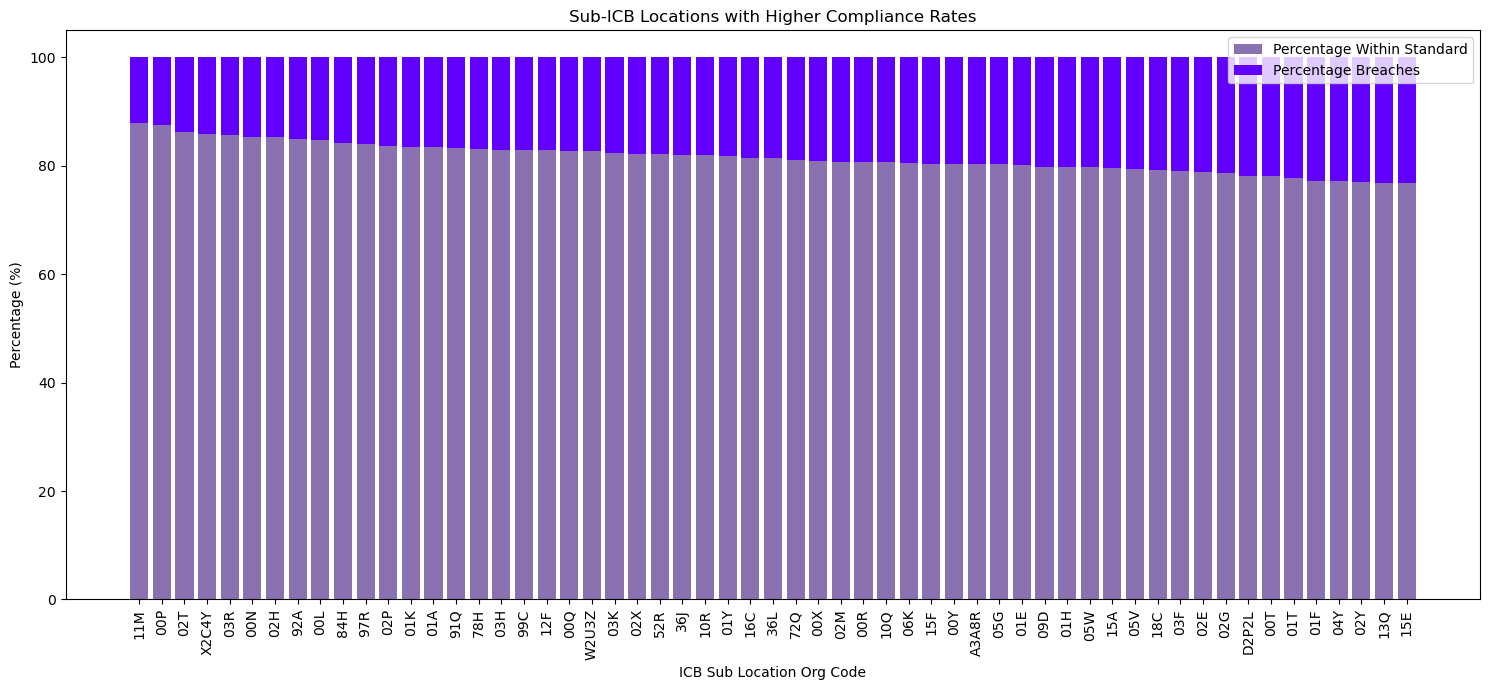

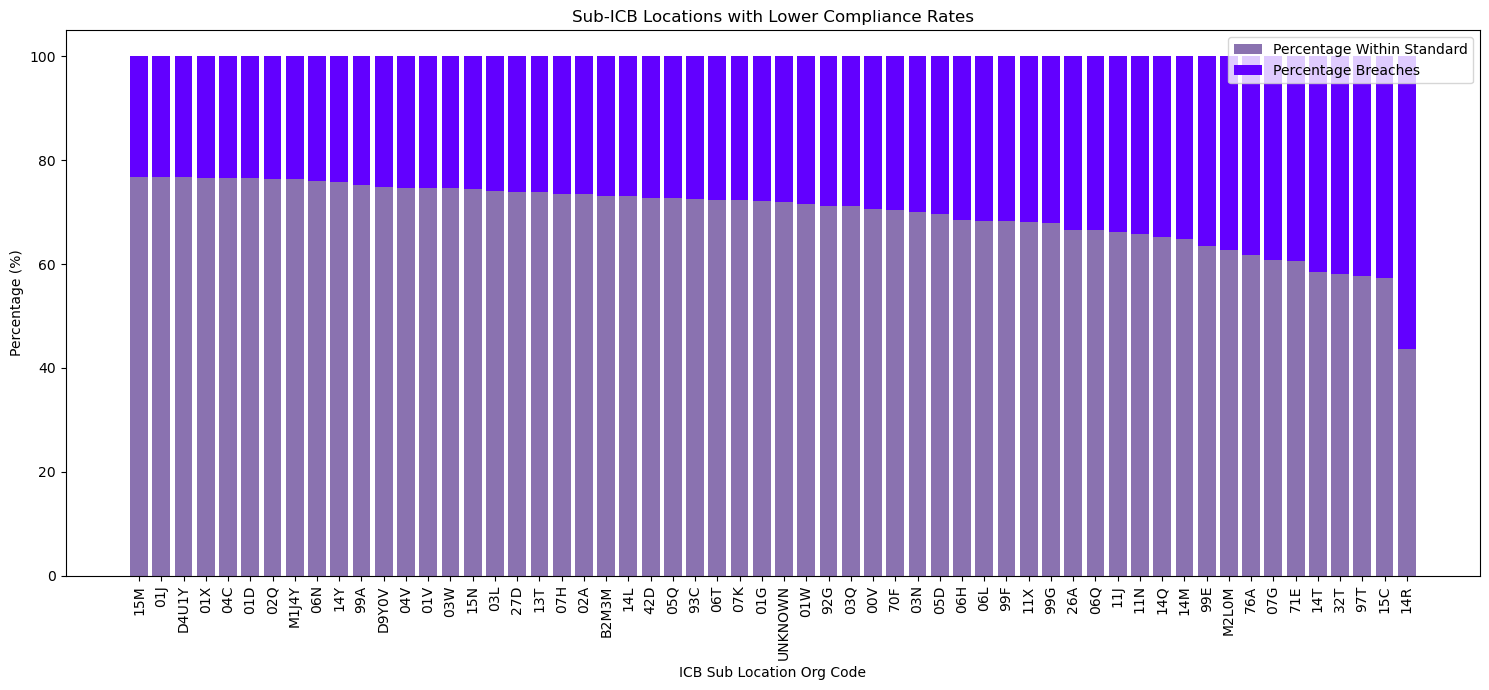

Top Half Data:
     ICB SUB LOCATION ORG CODE  Percentage Within Standard  Percentage Breaches
61                        11M                   87.908497            12.091503
2                         00P                   87.612127            12.387873
29                        02T                   86.152610            13.847390
114                     X2C4Y                   85.889473            14.110527
38                        03R                   85.765751            14.234249
1                         00N                   85.378645            14.621355
25                        02H                   85.313175            14.686825
95                        92A                   84.969846            15.030154
0                         00L                   84.856536            15.143464
93                        84H                   84.235137            15.764863
98                        97R                   83.956462            16.043538
27                        02P       

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've loaded your data into a DataFrame named 'data1'
# Group by 'ICB SUB LOCATION ORG CODE' and calculate the percentages
grouped_data = data1.groupby('ICB SUB LOCATION ORG CODE').apply(lambda x: pd.Series({
    'Percentage Within Standard': (x['WITHIN STANDARD'].sum() / x['TOTAL TREATED'].sum()) * 100,
    'Percentage Breaches': (x['BREACHES'].sum() / x['TOTAL TREATED'].sum()) * 100
})).reset_index()

# Sort the data by 'Percentage Within Standard'
sorted_data = grouped_data.sort_values(by='Percentage Within Standard', ascending=False)

# Split the data into top half and bottom half
mid_idx = len(sorted_data) // 2
top_half = sorted_data.iloc[:mid_idx]
bottom_half = sorted_data.iloc[mid_idx:]

# Function to plot the data
def plot_data(data, title):
    plt.figure(figsize=(15, 7))
    plt.bar(data['ICB SUB LOCATION ORG CODE'], data['Percentage Within Standard'], color='#8A72B0', label='Percentage Within Standard')
    plt.bar(data['ICB SUB LOCATION ORG CODE'], data['Percentage Breaches'], bottom=data['Percentage Within Standard'], color='#6200FF', label='Percentage Breaches')
    plt.xlabel('ICB Sub Location Org Code')
    plt.ylabel('Percentage (%)')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot the top half and bottom half
plot_data(top_half, 'Sub-ICB Locations with Higher Compliance Rates')
plot_data(bottom_half, 'Sub-ICB Locations with Lower Compliance Rates')

# Print the data for top half and bottom half
print("Top Half Data:\n", top_half)
print("\nBottom Half Data:\n", bottom_half)


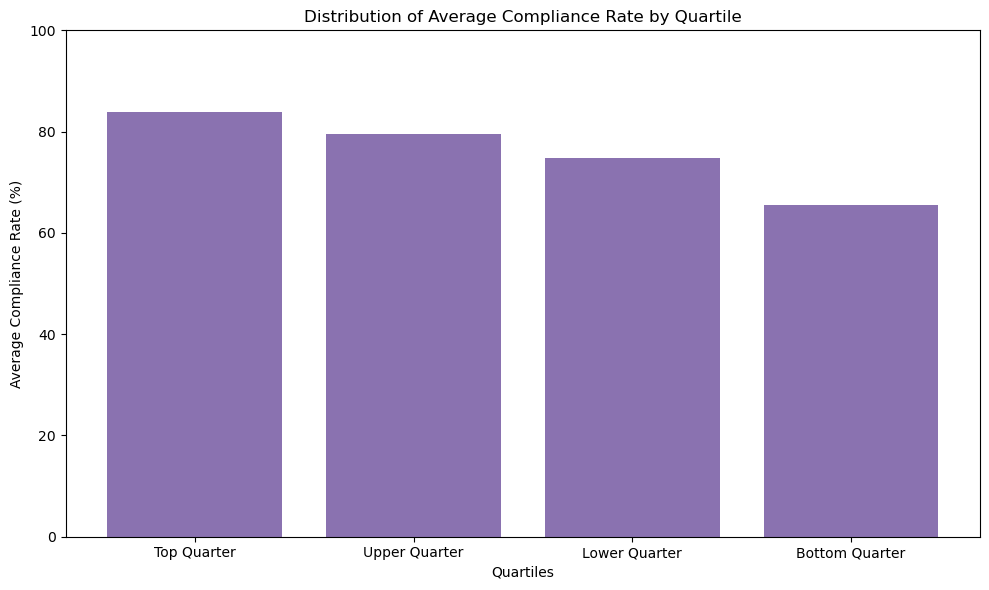

Average Compliance Rate by Quartile:
Top Quarter: 83.83%
Upper Quarter: 79.44%
Lower Quarter: 74.83%
Bottom Quarter: 65.54%


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've loaded your data into a DataFrame named 'data1'
# Group by 'ICB SUB LOCATION ORG CODE' and calculate the percentages
grouped_data = data1.groupby('ICB SUB LOCATION ORG CODE').apply(lambda x: pd.Series({
    'Percentage Within Standard': (x['WITHIN STANDARD'].sum() / x['TOTAL TREATED'].sum()) * 100
})).reset_index()

# Sort the data by 'Percentage Within Standard'
sorted_data = grouped_data.sort_values(by='Percentage Within Standard', ascending=False)

# Calculate quartile indices
q1_idx = len(sorted_data) // 4
q2_idx = q1_idx * 2
q3_idx = q1_idx * 3

# Calculate average compliance rate for each quartile
top_quarter_avg = sorted_data.iloc[:q1_idx]['Percentage Within Standard'].mean()
upper_quarter_avg = sorted_data.iloc[q1_idx:q2_idx]['Percentage Within Standard'].mean()
lower_quarter_avg = sorted_data.iloc[q2_idx:q3_idx]['Percentage Within Standard'].mean()
bottom_quarter_avg = sorted_data.iloc[q3_idx:]['Percentage Within Standard'].mean()

# Plotting
plt.figure(figsize=(10, 6))
quartiles = ['Top Quarter', 'Upper Quarter', 'Lower Quarter', 'Bottom Quarter']
values = [top_quarter_avg, upper_quarter_avg, lower_quarter_avg, bottom_quarter_avg]
plt.bar(quartiles, values, color='#8A72B0')
plt.xlabel('Quartiles')
plt.ylabel('Average Compliance Rate (%)')
plt.title('Distribution of Average Compliance Rate by Quartile')
plt.ylim(0, 100)  # Set y-axis range to 0-100 for percentages
plt.tight_layout()
plt.show()

# Printing the data
print("Average Compliance Rate by Quartile:")
print(f"Top Quarter: {top_quarter_avg:.2f}%")
print(f"Upper Quarter: {upper_quarter_avg:.2f}%")
print(f"Lower Quarter: {lower_quarter_avg:.2f}%")
print(f"Bottom Quarter: {bottom_quarter_avg:.2f}%")



In [15]:
# Group by 'ICB SUB LOCATION ORG CODE' to get the sum of 'TOTAL TREATED', 'WITHIN STANDARD', and 'BREACHES' for each location
grouped_data = data.groupby('ICB SUB LOCATION ORG CODE').agg({
    'TOTAL TREATED': 'sum',
    'WITHIN STANDARD': 'sum',
    'BREACHES': 'sum'
}).reset_index()

# Extract the columns for anomaly detection and normalize the data
X = grouped_data[['TOTAL TREATED', 'WITHIN STANDARD', 'BREACHES']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
grouped_data['Anomaly'] = iso_forest.fit_predict(X_scaled)

# Define colors
colors = {
    'Normal': '#8A72B0',
    'Anomaly': '#6200FF'
}

# Visualize the detected anomalies using a scatter plot (using 'TOTAL TREATED' and 'BREACHES' for visualization)
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data[grouped_data['Anomaly'] == 1]['Total Treated'], 
            grouped_data[grouped_data['Anomaly'] == 1]['Breaches'], 
            label='Normal', color=colors['Normal'])
plt.scatter(grouped_data[grouped_data['Anomaly'] == -1]['Total Treated'], 
            grouped_data[grouped_data['Anomaly'] == -1]['Breaches'], 
            label='Anomaly', color=colors['Anomaly'])
plt.title('Anomaly Detection for ICB Sub Locations')
plt.xlabel('TOTAL TREATED')
plt.ylabel('BREACHES')
plt.legend()
plt.show()

# Display the ICB sub-locations detected as anomalies
print("ICB Sub Locations detected as anomalies:")
print(grouped_data[grouped_data['Anomaly'] == -1][['ICB SUB LOCATION ORG CODE']])


KeyError: 'Total Treated'

<Figure size 1000x600 with 0 Axes>

In [32]:
import numpy as np
from scipy.stats import ttest_ind

# Randomly select two ICB sub-locations
sample_locations = np.random.choice(grouped_data['ICB SUB LOCATION ORG CODE'], 2, replace=False)

# Extract data for the two selected ICB sub-locations
sample_1 = grouped_data[grouped_data['ICB SUB LOCATION ORG CODE'] == sample_locations[0]]['WITHIN STANDARD']
sample_2 = grouped_data[grouped_data['ICB SUB LOCATION ORG CODE'] == sample_locations[1]]['WITHIN STANDARD']

# Conduct the Independent Two-Sample T-test
t_stat, p_value = ttest_ind(sample_1, sample_2)

# Print the results
print(f"ICB Sub-locations compared: {sample_locations[0]} and {sample_locations[1]}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There's a significant difference in the mean number of patients treated within the standard between the two ICB sub-locations.")
else:
    print("Fail to reject the null hypothesis. There's no significant difference in the mean number of patients treated within the standard between the two ICB sub-locations.")


ICB Sub-locations compared: 11N and 99E
T-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There's no significant difference in the mean number of patients treated within the standard between the two ICB sub-locations.


/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_950/3894985485.py:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(sample_1, sample_2)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. Data Preparation
X = grouped_data[['TOTAL TREATED', 'WITHIN STANDARD']]
y = grouped_data['BREACHES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model Building
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3. Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 4. Prediction (example)
new_data = np.array([[1000, 900], [800, 700]])  # Example data: [[TOTAL TREATED, WITHIN STANDARD], ...]
predicted_breaches = model.predict(new_data)
print(f"Predicted Breaches for the new data: {predicted_breaches}")



Mean Squared Error: 1031322.4632478261
Predicted Breaches for the new data: [225.66 192.9 ]


/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass' not found.
findfont: Font family 'Overpass'

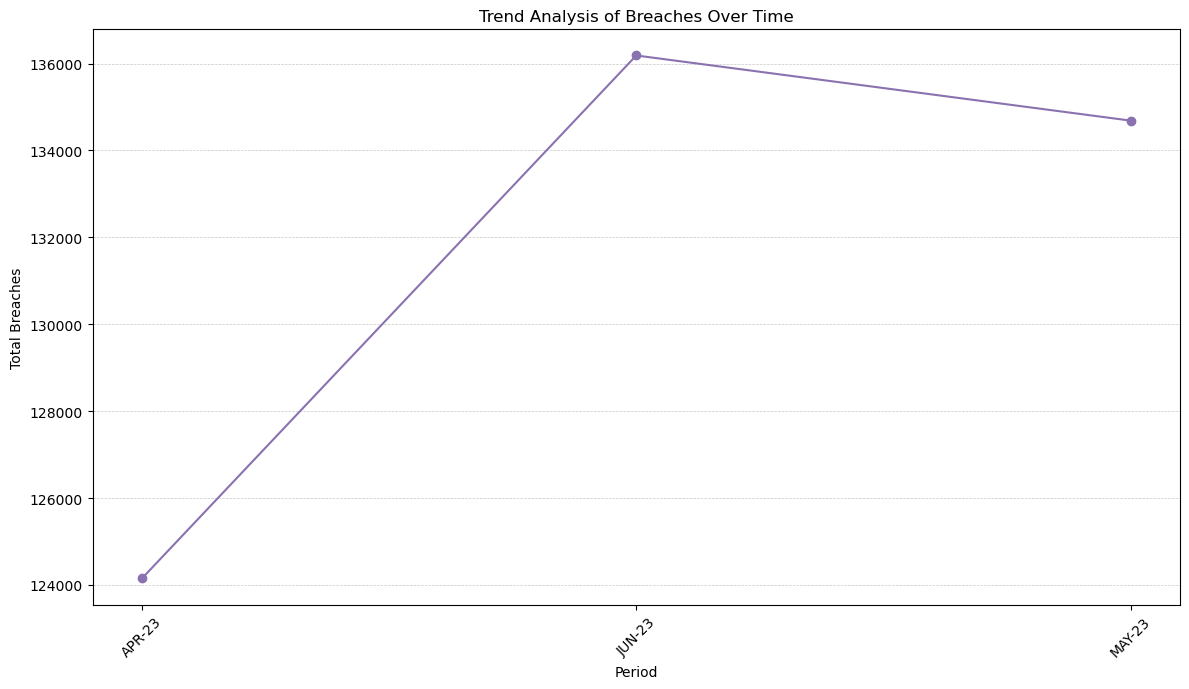

In [35]:
import matplotlib.pyplot as plt

# 1. Data Aggregation
trend_data = data.groupby('Period').agg({'BREACHES': 'sum'}).reset_index()

# 2. Visualization
plt.figure(figsize=(12, 7))
plt.plot(trend_data['Period'], trend_data['BREACHES'], marker='o', linestyle='-', color='#8A72B0')
plt.xlabel('Period')
plt.ylabel('Total Breaches')
plt.title('Trend Analysis of Breaches Over Time')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [14]:
import matplotlib.pyplot as plt

# Sort the data by 'Percentage Within Standard'
sorted_data = grouped_data.sort_values(by='Percentage Within Standard', ascending=False)

# Split the data into top half and bottom half
mid_idx = len(sorted_data) // 2
top_half = sorted_data.iloc[:mid_idx]
bottom_half = sorted_data.iloc[mid_idx:]

# Function to plot the data
def plot_data(data, title):
    plt.figure(figsize=(15, 7))
    plt.bar(data['ICB SUB LOCATION ORG CODE'], data['Percentage Within Standard'], color='#8A72B0', label='Percentage Within Standard')
    plt.bar(data['ICB SUB LOCATION ORG CODE'], data['Percentage Breaches'], bottom=data['Percentage Within Standard'], color='#6200FF', label='Percentage Breaches')
    plt.xlabel('ICB Sub Location Org Code')
    plt.ylabel('Percentage (%)')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot the top half and bottom half
plot_data(top_half, 'Sub-ICB Locations with Higher Compliance Rates')
plot_data(bottom_half, 'Sub-ICB Locations with Lower Compliance Rates')

#Print data
print("Top Half Data:\n", top_half)
print("\nBottom Half Data:\n", bottom_half)



NameError: name 'grouped_data' is not defined

In [23]:
#Capacity Utilisation
# Load the data
data = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx")

# Calculate capacity utilization
data['Capacity Utilization'] = (data['Total Treated'] / data['Total Capacity']) * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(data['ICB (Integrative Care Board) Sub Location Org Code'], data['Capacity Utilization'], color='#6200FF')
plt.xlabel('ICB Sub Location Org Code')
plt.ylabel('Capacity Utilization (%)')
plt.title('Capacity Utilization by ICB Sub Location Org Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Total Treated'

ValueError: aspect must be finite and positive 

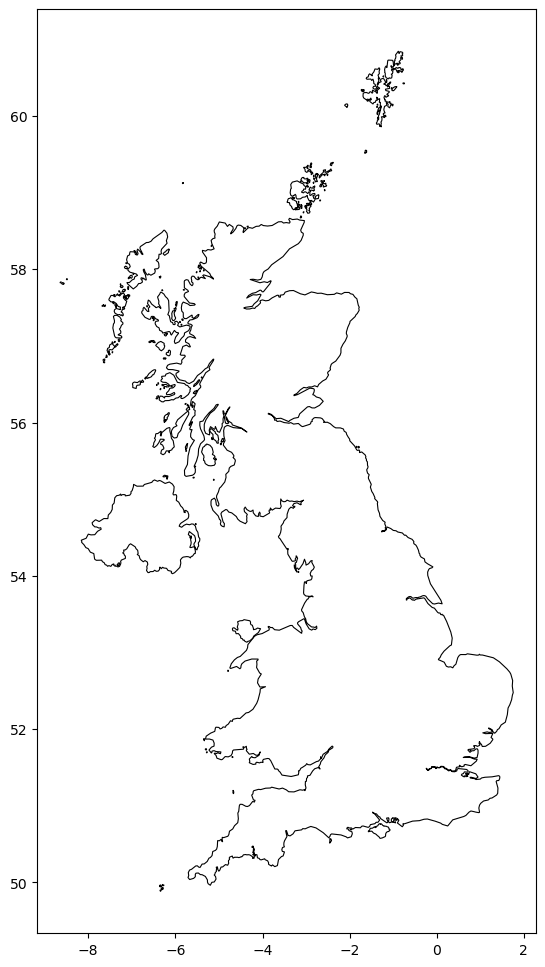

In [24]:
# Load the data
data1 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet 1")
data2 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet2")

# Merge the datasets
merged_data = pd.merge(data1, data2, left_on="ICB SUB LOCATION ORG CODE", right_on="Sub ICB Location Code", how="left")

# Load the UK shapefile
shapefile_path = "/Users/user/Downloads/geoBoundaries-GBR-ADM0-all/geoBoundaries-GBR-ADM0.shp"
uk_map = gpd.read_file(shapefile_path)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
uk_map.boundary.plot(ax=ax, color='black', linewidth=0.8)
for sub_location_code, data in merged_data.groupby('ICB SUB LOCATION ORG CODE'):
    uk_map[uk_map['shapeISO'] == sub_location_code].plot(ax=ax, color='#6200FF')

ax.set_title('ICB Sub Location Org Codes on UK Map')
ax.set_aspect('equal')  # Set aspect ratio to 'equal' to ensure a valid plot
plt.show()




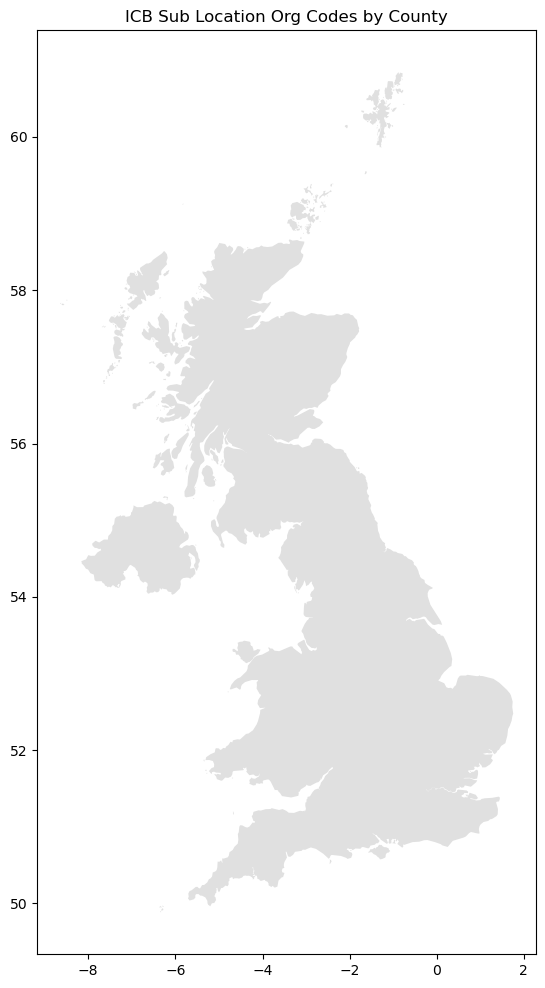

In [27]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the data
data1 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet 1")
data2 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet2")

# Merge the datasets
merged_data = pd.merge(data1, data2, left_on="ICB SUB LOCATION ORG CODE", right_on="Sub ICB Location Code", how="left")

# Load the UK shapefile
shapefile_path = "/Users/user/Downloads/geoBoundaries-GBR-ADM0-all/geoBoundaries-GBR-ADM0.shp"
uk_map = gpd.read_file(shapefile_path)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
uk_map.plot(ax=ax, color='#E0E0E0')  # Light gray color for the UK boundary

# Annotate the map with the names of the counties
for idx, row in merged_data.iterrows():
    ax.annotate(row['Geographic Location (County)'], 
                xy=(0.5, 0.5),  # This places all annotations at the center; you can adjust as needed
                xytext=(3,3), 
                textcoords="offset points",
                ha='center', 
                fontsize=8)

ax.set_title('ICB Sub Location Org Codes by County')
plt.show()


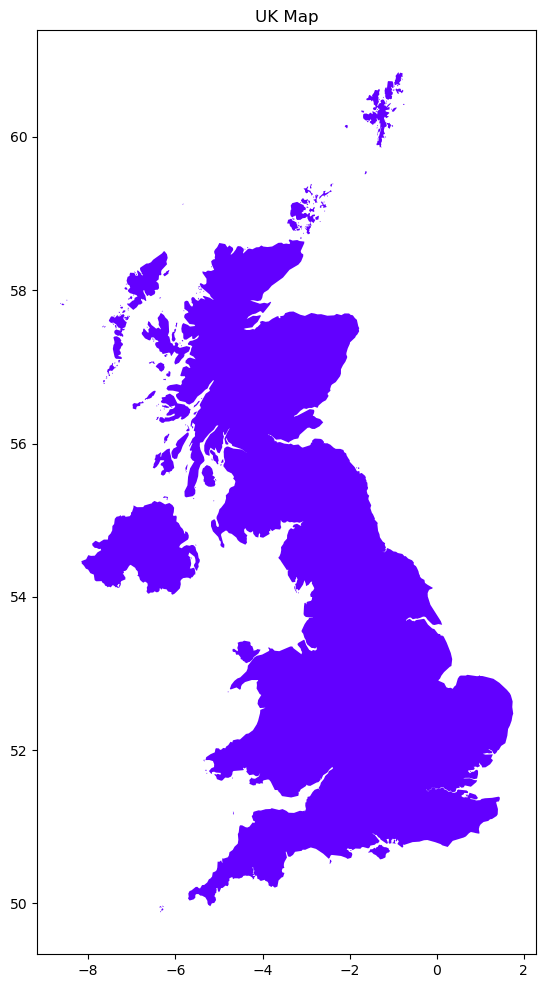

In [25]:
# Load the UK shapefile
shapefile_path = "/Users/user/Downloads/geoBoundaries-GBR-ADM0-all/geoBoundaries-GBR-ADM0.shp"
uk_map = gpd.read_file(shapefile_path)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
uk_map.plot(ax=ax, color='#6200FF')
ax.set_title('UK Map')
plt.show()


In [28]:
# Load the data
data1 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet 1")
data2 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet2")

# Merge the datasets
merged_data = pd.merge(data1, data2, left_on="ICB SUB LOCATION ORG CODE", right_on="Sub ICB Location Code", how="left")

# Load the UK shapefile
shapefile_path = "/Users/user/Downloads/infuse_cnty_lyr_2011/infuse_cnty_lyr_2011.shp"
uk_counties = gpd.read_file(shapefile_path)

# Check the columns of the shapefile
print(uk_counties.columns)

Index(['geo_code', 'geo_label', 'label', 'name', 'geometry'], dtype='object')


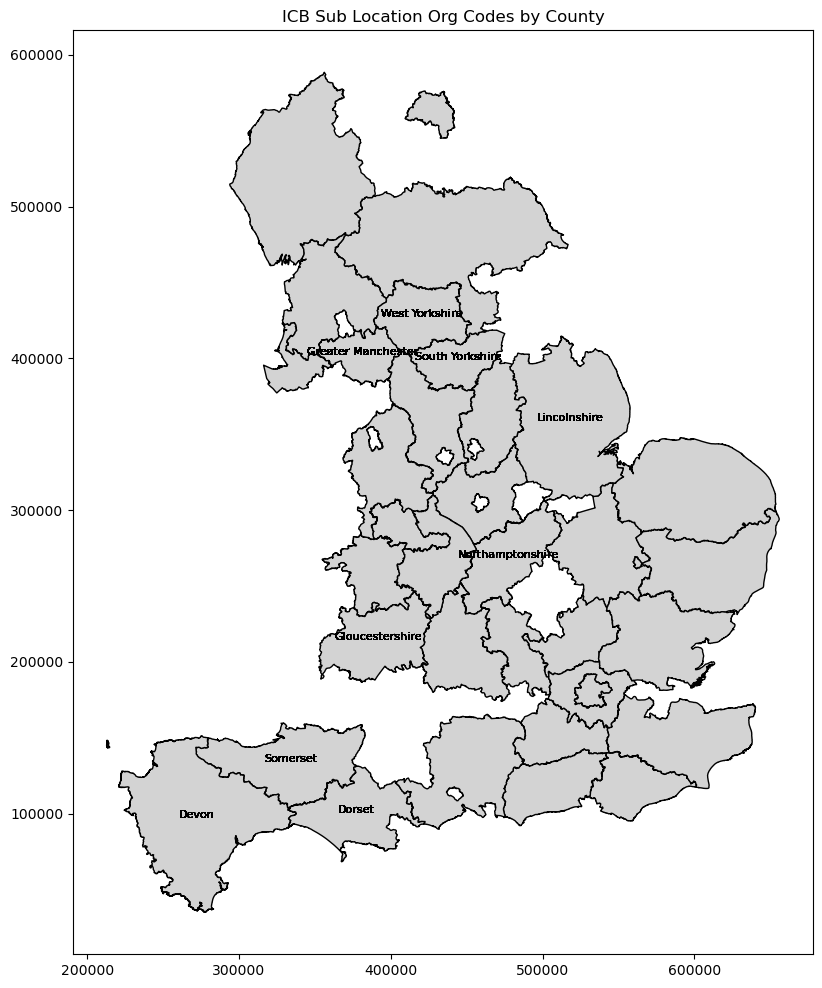

In [30]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the data
data1 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet 1")
data2 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet2")

# Merge the datasets
merged_data = pd.merge(data1, data2, left_on="ICB SUB LOCATION ORG CODE", right_on="Sub ICB Location Code", how="left")

# Load the UK shapefile
shapefile_path = "/Users/user/Downloads/infuse_cnty_lyr_2011/infuse_cnty_lyr_2011.shp"
uk_counties = gpd.read_file(shapefile_path)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
uk_counties.plot(ax=ax, color='#D3D3D3', edgecolor='black')  # Adjusted color for the UK counties and added edgecolor

# Annotate the map with the names of the counties
for idx, row in merged_data.iterrows():
    if row['Geographic Location (County)'] in uk_counties['name'].values:
        county_geometry = uk_counties[uk_counties['name'] == row['Geographic Location (County)']].geometry.iloc[0]
        ax.annotate(row['Geographic Location (County)'], 
                    xy=(county_geometry.centroid.x, county_geometry.centroid.y),
                    ha='center', 
                    fontsize=8)

ax.set_title('ICB Sub Location Org Codes by County')
plt.show()



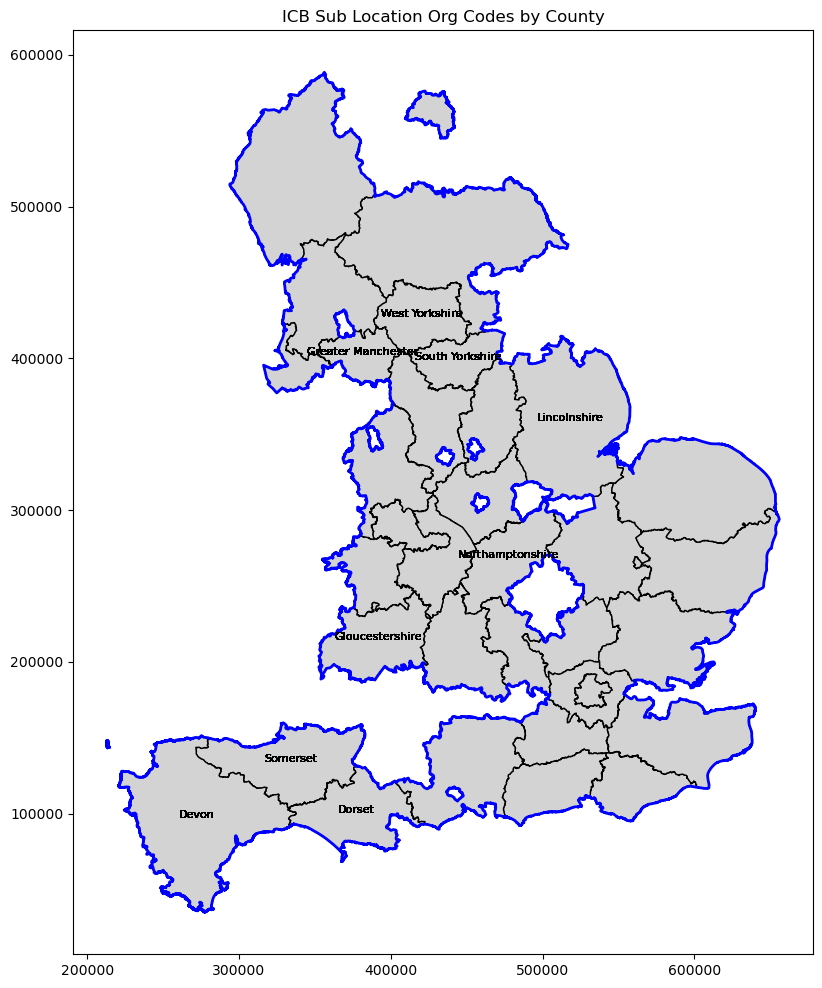

In [31]:
# Load the data
data1 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet 1")
data2 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet2")

# Merge the datasets
merged_data = pd.merge(data1, data2, left_on="ICB SUB LOCATION ORG CODE", right_on="Sub ICB Location Code", how="left")

# Load the UK shapefile
shapefile_path = "/Users/user/Downloads/infuse_cnty_lyr_2011/infuse_cnty_lyr_2011.shp"
uk_counties = gpd.read_file(shapefile_path)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the individual counties
uk_counties.plot(ax=ax, color='#D3D3D3', edgecolor='black')  # Adjusted color for the UK counties and added edgecolor

# Plot the outline of the entire UK
uk_outline = uk_counties.unary_union
uk_boundary = gpd.GeoSeries(uk_outline)
uk_boundary.boundary.plot(ax=ax, color='blue', linewidth=2)

# Annotate the map with the names of the counties
for idx, row in merged_data.iterrows():
    if row['Geographic Location (County)'] in uk_counties['name'].values:
        county_geometry = uk_counties[uk_counties['name'] == row['Geographic Location (County)']].geometry.iloc[0]
        ax.annotate(row['Geographic Location (County)'], 
                    xy=(county_geometry.centroid.x, county_geometry.centroid.y),
                    ha='center', 
                    fontsize=8)

ax.set_title('ICB Sub Location Org Codes by County')
plt.show()


In [34]:
pip install contextily


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 1.9 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/21/41/aef6108ee3be520166e87d23daf20a877303398a685cab26f5387ec3a5d7/rasterio-1.3.8-cp310-cp310-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for xyzservices from https://files.pythonhosted.org/packages/50/d7/2ca7f65c189aa71b5a9dfeaabc0b4ab8d50bead74a7863428c579737d625/xyzservices-2023.7.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 130.1 kB/s eta 0:00:00:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 538.6 kB/s eta 0:00:00--:--
Note: you may need to restart the kernel to use updated packages.


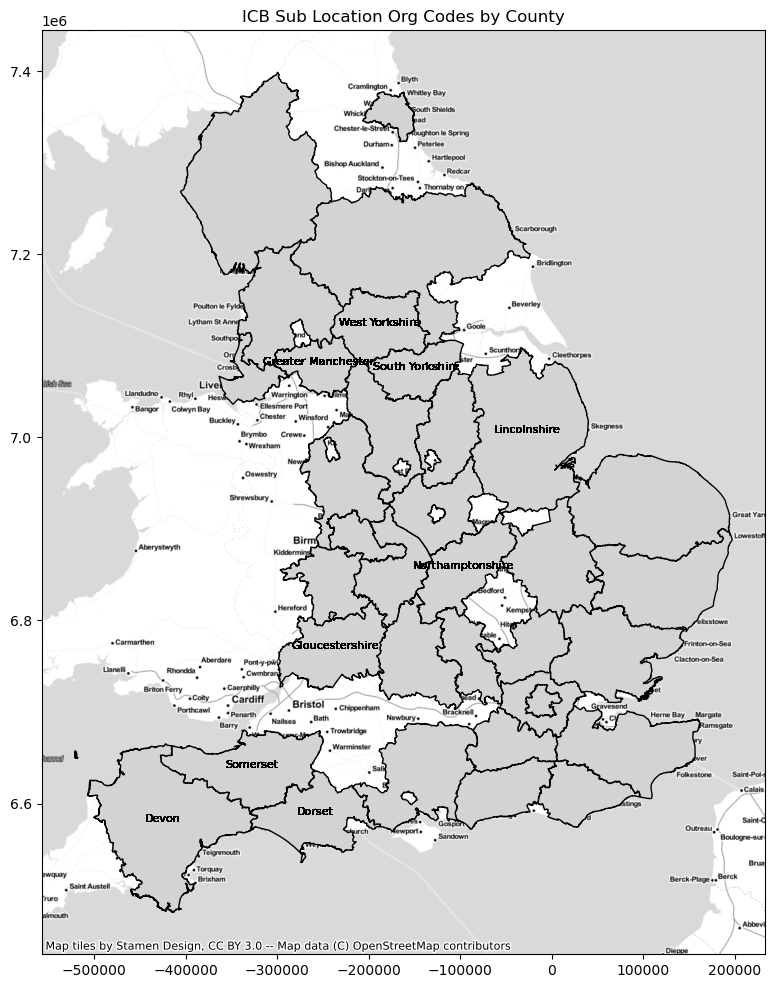

In [35]:

# Load the data
data1 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet 1")
data2 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet2")

# Merge the datasets
merged_data = pd.merge(data1, data2, left_on="ICB SUB LOCATION ORG CODE", right_on="Sub ICB Location Code", how="left")

# Load the UK shapefile
shapefile_path = "/Users/user/Downloads/infuse_cnty_lyr_2011/infuse_cnty_lyr_2011.shp"
uk_counties = gpd.read_file(shapefile_path)

# Convert the CRS to Web Mercator (epsg:3857) for contextily
uk_counties = uk_counties.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the individual counties
uk_counties.plot(ax=ax, color='#D3D3D3', edgecolor='black')  # Adjusted color for the UK counties and added edgecolor

# Annotate the map with the names of the counties
for idx, row in merged_data.iterrows():
    if row['Geographic Location (County)'] in uk_counties['name'].values:
        county_geometry = uk_counties[uk_counties['name'] == row['Geographic Location (County)']].geometry.iloc[0]
        ax.annotate(row['Geographic Location (County)'], 
                    xy=(county_geometry.centroid.x, county_geometry.centroid.y),
                    ha='center', 
                    fontsize=8)

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

ax.set_title('ICB Sub Location Org Codes by County')
plt.show()


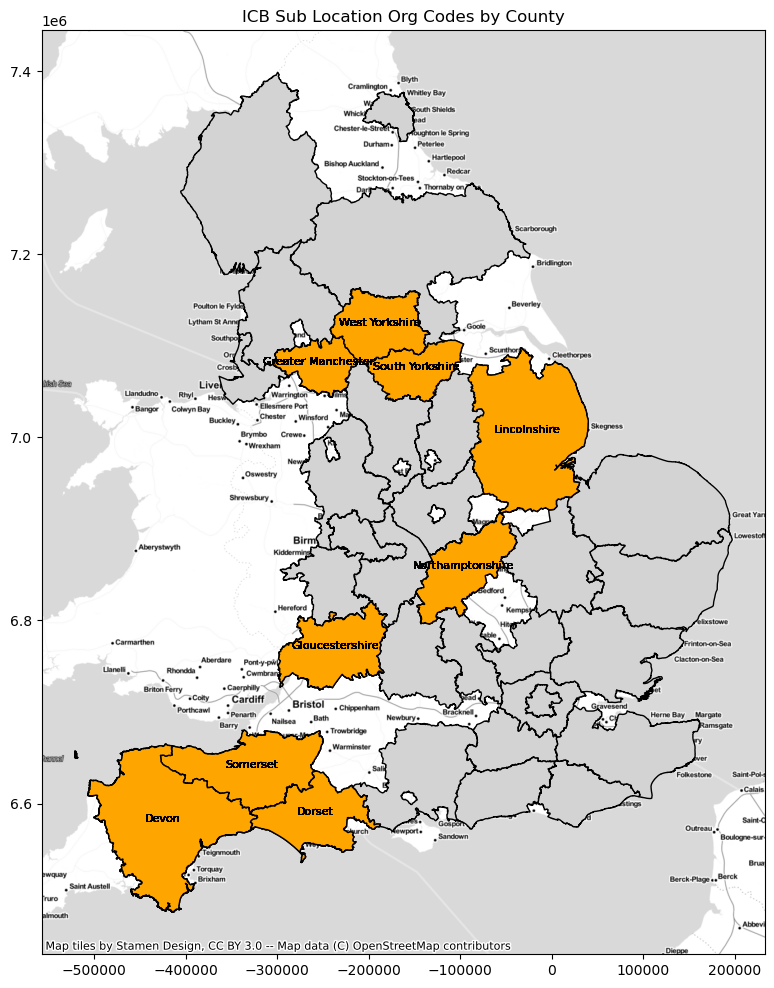

In [36]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load the data
data1 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet 1")
data2 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet2")

# Merge the datasets
merged_data = pd.merge(data1, data2, left_on="ICB SUB LOCATION ORG CODE", right_on="Sub ICB Location Code", how="left")

# Load the UK shapefile
shapefile_path = "/Users/user/Downloads/infuse_cnty_lyr_2011/infuse_cnty_lyr_2011.shp"
uk_counties = gpd.read_file(shapefile_path)

# Convert the CRS to Web Mercator (epsg:3857) for contextily
uk_counties = uk_counties.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot all counties in light gray
uk_counties.plot(ax=ax, color='#D3D3D3', edgecolor='black')

# Highlight the counties present in your dataset with a distinct color
highlighted_counties = uk_counties[uk_counties['name'].isin(merged_data['Geographic Location (County)'].unique())]
highlighted_counties.plot(ax=ax, color='#FFA500', edgecolor='black')  # Using orange color for highlighted counties

# Annotate the map with the names of the counties
for idx, row in merged_data.iterrows():
    if row['Geographic Location (County)'] in uk_counties['name'].values:
        county_geometry = uk_counties[uk_counties['name'] == row['Geographic Location (County)']].geometry.iloc[0]
        ax.annotate(row['Geographic Location (County)'], 
                    xy=(county_geometry.centroid.x, county_geometry.centroid.y),
                    ha='center', 
                    fontsize=8)

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

ax.set_title('ICB Sub Location Org Codes by County')
plt.show()


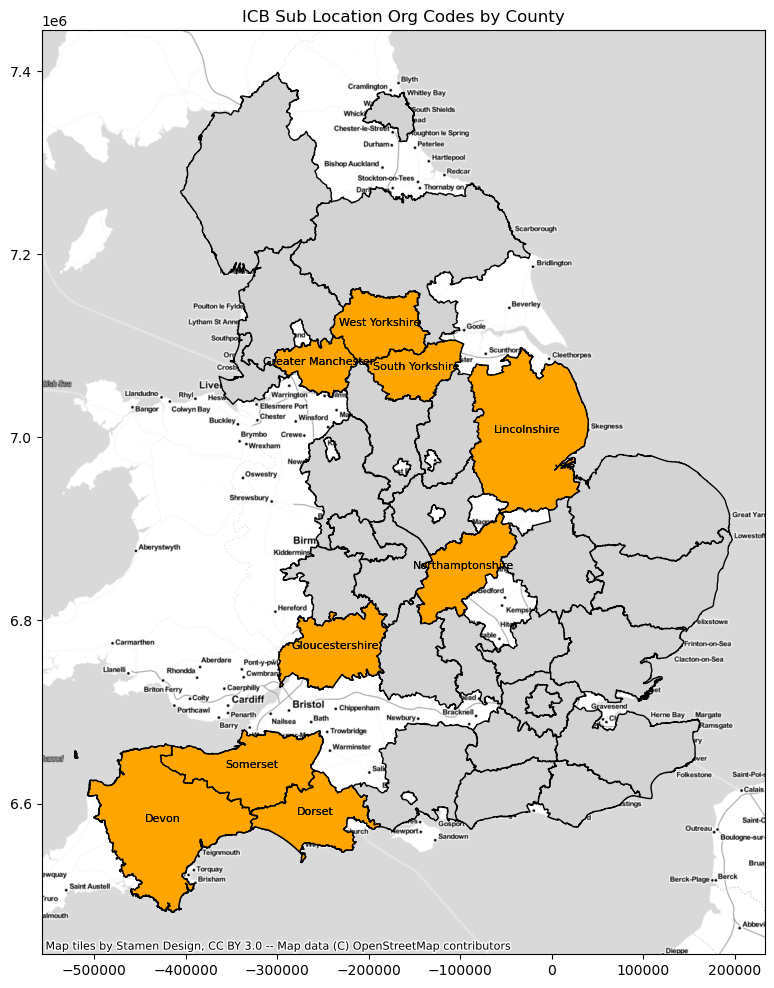

In [37]:
# Load the data
data1 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet 1")
data2 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet2")

# Merge the datasets
merged_data = pd.merge(data1, data2, left_on="ICB SUB LOCATION ORG CODE", right_on="Sub ICB Location Code", how="left")

# Load the UK shapefile
shapefile_path = "/Users/user/Downloads/infuse_cnty_lyr_2011/infuse_cnty_lyr_2011.shp"
uk_counties = gpd.read_file(shapefile_path)

# Convert the CRS to Web Mercator (epsg:3857) for contextily
uk_counties = uk_counties.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot all counties in light gray
uk_counties.plot(ax=ax, color='#D3D3D3', edgecolor='black')

# Highlight the counties present in your dataset with a distinct color
counties_to_highlight = list(merged_data['Geographic Location (County)'].unique()) + list(data2['Geographic Location (County)'].unique())
highlighted_counties = uk_counties[uk_counties['name'].isin(counties_to_highlight)]
highlighted_counties.plot(ax=ax, color='#FFA500', edgecolor='black')  # Using orange color for highlighted counties

# Annotate the map with the names of the counties
for county in counties_to_highlight:
    if county in uk_counties['name'].values:
        county_geometry = uk_counties[uk_counties['name'] == county].geometry.iloc[0]
        ax.annotate(county, 
                    xy=(county_geometry.centroid.x, county_geometry.centroid.y),
                    ha='center', 
                    fontsize=8)

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

ax.set_title('ICB Sub Location Org Codes by County')
plt.show()


/Users/user/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/user/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/user/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/user/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/user/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/user/anaconda3/lib/python3.10/site-packages

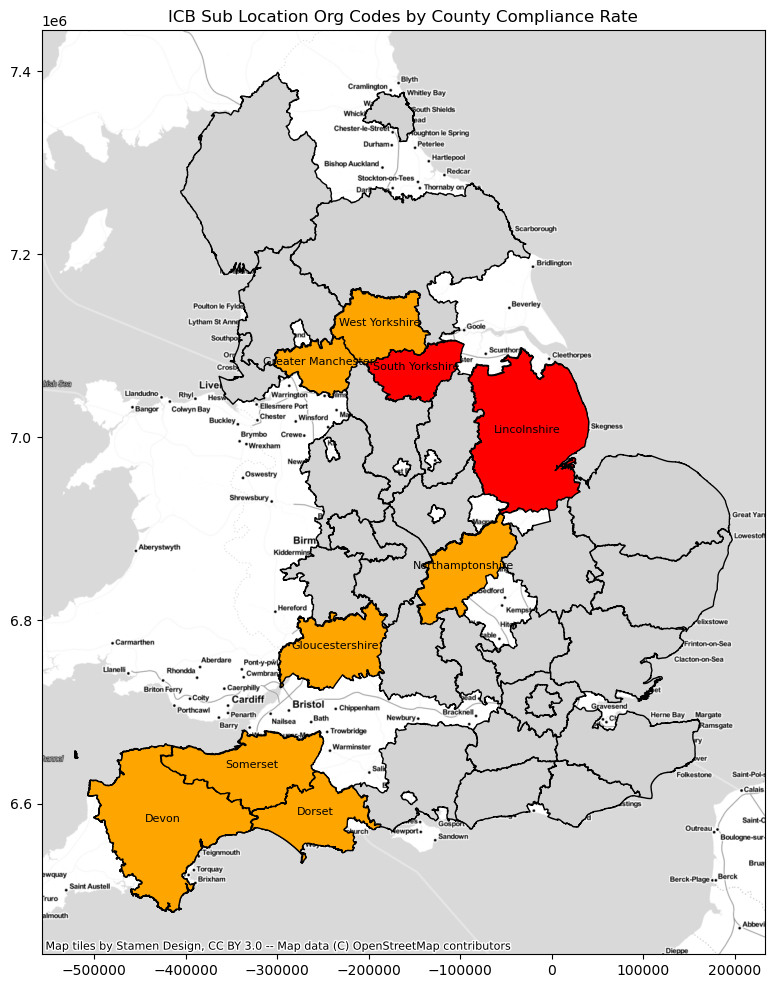

In [43]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load the data
data1 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet 1")
data2 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet2")

# Merge the datasets
merged_data = pd.merge(data1, data2, left_on="ICB SUB LOCATION ORG CODE", right_on="Sub ICB Location Code", how="left")

# Calculate the compliance rate for each county
merged_data['Compliance Rate'] = (merged_data['WITHIN STANDARD'] / merged_data['TOTAL TREATED']) * 100

# Calculate the average compliance rate
average_compliance_rate = merged_data['Compliance Rate'].mean()

# Load the UK shapefile
shapefile_path = "/Users/user/Downloads/infuse_cnty_lyr_2011/infuse_cnty_lyr_2011.shp"
uk_counties = gpd.read_file(shapefile_path)

# Convert the CRS to Web Mercator (epsg:3857) for contextily
uk_counties = uk_counties.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot all counties in light gray
uk_counties.plot(ax=ax, color='#D3D3D3', edgecolor='black')

# Highlight the counties based on their compliance rate
for county, data in merged_data.groupby('Geographic Location (County)'):
    color = '#FFA500' if data['Compliance Rate'].mean() >= average_compliance_rate else '#FF0000'  # Orange for above-average compliance, Red for below-average
    uk_counties[uk_counties['name'] == county].plot(ax=ax, color=color, edgecolor='black')

# Annotate the map with the names of the counties
for county in merged_data['Geographic Location (County)'].unique():
    if county in uk_counties['name'].values:
        county_geometry = uk_counties[uk_counties['name'] == county].geometry.iloc[0]
        ax.annotate(county, 
                    xy=(county_geometry.centroid.x, county_geometry.centroid.y),
                    ha='center', 
                    fontsize=8)

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

ax.set_title('ICB Sub Location Org Codes by County Compliance Rate')
plt.show()


/Users/user/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/user/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/user/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/user/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/user/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/user/anaconda3/lib/python3.10/site-packages

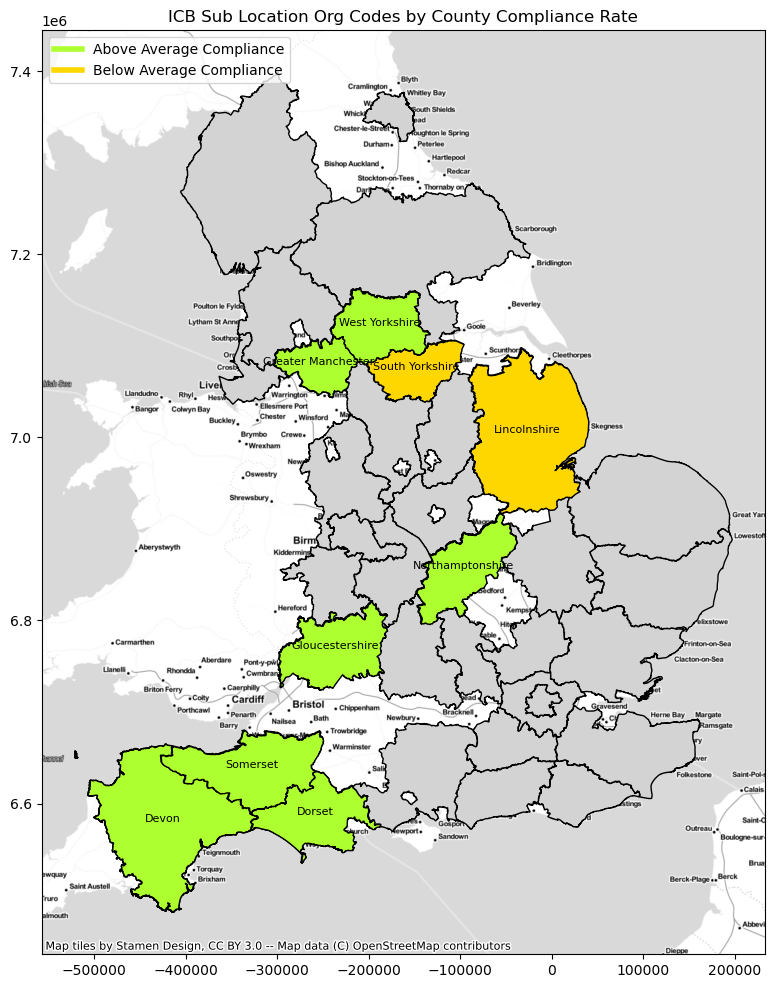

In [44]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load the data
data1 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet 1")
data2 = pd.read_excel("/Users/user/Downloads/Cancer-Waiting-Times-April-2023-June-2023-Data-Extract-ICB-Sub-Location.xlsx", sheet_name="Sheet2")

# Merge the datasets
merged_data = pd.merge(data1, data2, left_on="ICB SUB LOCATION ORG CODE", right_on="Sub ICB Location Code", how="left")

# Calculate the compliance rate for each county
merged_data['Compliance Rate'] = (merged_data['WITHIN STANDARD'] / merged_data['TOTAL TREATED']) * 100

# Calculate the average compliance rate
average_compliance_rate = merged_data['Compliance Rate'].mean()

# Load the UK shapefile
shapefile_path = "/Users/user/Downloads/infuse_cnty_lyr_2011/infuse_cnty_lyr_2011.shp"
uk_counties = gpd.read_file(shapefile_path)

# Convert the CRS to Web Mercator (epsg:3857) for contextily
uk_counties = uk_counties.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot all counties in light gray
uk_counties.plot(ax=ax, color='#D3D3D3', edgecolor='black')

# Highlight the counties based on their compliance rate
for county, data in merged_data.groupby('Geographic Location (County)'):
    color = '#ADFF2F' if data['Compliance Rate'].mean() >= average_compliance_rate else '#FFD700'  # Green for above-average compliance, Light Orange for below-average
    uk_counties[uk_counties['name'] == county].plot(ax=ax, color=color, edgecolor='black')

# Annotate the map with the names of the counties
for county in merged_data['Geographic Location (County)'].unique():
    if county in uk_counties['name'].values:
        county_geometry = uk_counties[uk_counties['name'] == county].geometry.iloc[0]
        ax.annotate(county, 
                    xy=(county_geometry.centroid.x, county_geometry.centroid.y),
                    ha='center', 
                    fontsize=8)

# Add a legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='#ADFF2F', lw=4, label='Above Average Compliance'),
                   Line2D([0], [0], color='#FFD700', lw=4, label='Below Average Compliance')]
ax.legend(handles=legend_elements, loc='upper left')

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

ax.set_title('ICB Sub Location Org Codes by County Compliance Rate')
plt.show()



In [41]:
# Aggregate data by Sub ICB Location Code
aggregated_data = merged_data.groupby('Sub ICB Location Code').agg({'TOTAL TREATED': 'sum'}).sort_values(by='TOTAL TREATED', ascending=False)

# Display the top few codes with the highest total patients treated
print(aggregated_data.head())

# Check if any code's total is close to the sum of all patients treated
total_patients = merged_data['TOTAL TREATED'].sum()
potential_codes = aggregated_data[aggregated_data['TOTAL TREATED'] >= total_patients * 0.9]  # Assuming the national code covers at least 90% of all patients

print("\nPotential Sub ICB Location Codes covering the entire UK:")
print(potential_codes)


                       TOTAL TREATED
Sub ICB Location Code               
91Q                            61943
72Q                            52839
15N                            47718
93C                            42813
36L                            41015

Potential Sub ICB Location Codes covering the entire UK:
Empty DataFrame
Columns: [TOTAL TREATED]
Index: []


      Period     YEAR MONTH             STANDARD ICB SUB LOCATION ORG CODE  \
0     MAY-23  2023/24   MAY                  2WW                       00L   
1     MAY-23  2023/24   MAY          28 Days FDS                       00L   
2     JUN-23  2023/24   JUN                  2WW                       00L   
3     JUN-23  2023/24   JUN          28 Days FDS                       00L   
4     APR-23  2023/24   APR                  2WW                       00L   
...      ...      ...   ...                  ...                       ...   
3312  JUN-23  2023/24   JUN    62 Days (Upgrade)                     X2C4Y   
3313  APR-23  2023/24   APR  62 Days (Screening)                     X2C4Y   
3314  MAY-23  2023/24   MAY    62 Days (Upgrade)                     X2C4Y   
3315  MAY-23  2023/24   MAY  62 Days (Screening)                     X2C4Y   
3316  APR-23  2023/24   APR    62 Days (Upgrade)                     X2C4Y   

      TOTAL TREATED  WITHIN STANDARD  BREACHES  Unnamed: 8  Unn

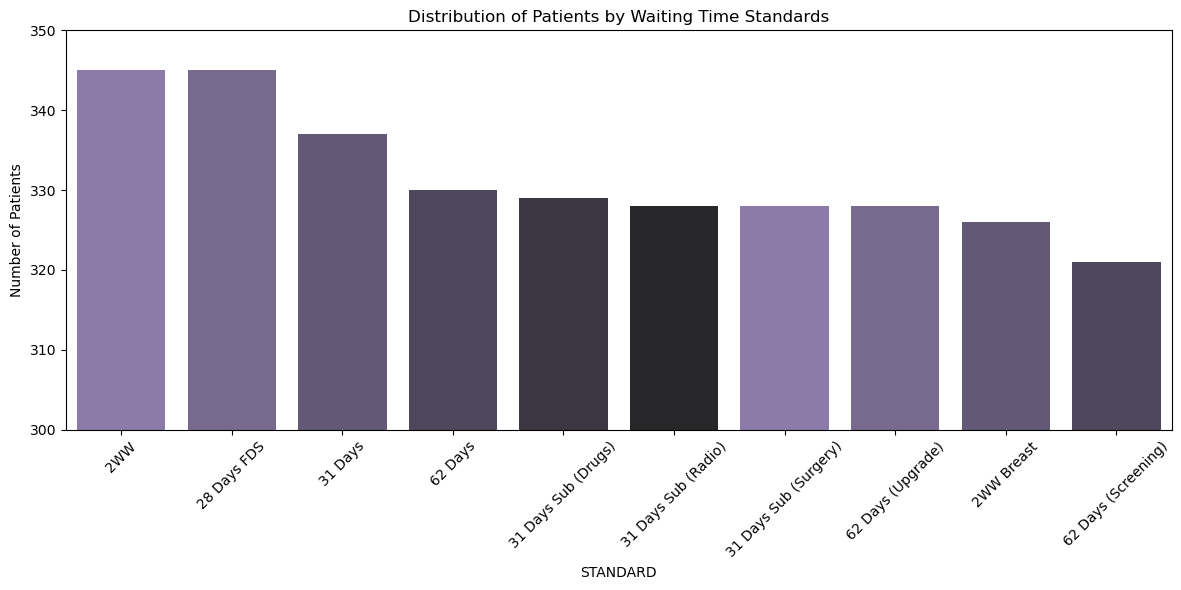

KeyError: 'Column not found: WAITING_TIME'

In [19]:
# Print the data
print(data1)

# Analyze the distribution of patients across different waiting time standards
plt.figure(figsize=(12, 6))
sns.countplot(data=data1, x='STANDARD', order=data1['STANDARD'].value_counts().index, palette=sns.dark_palette("#8A72B0", reverse=True))
plt.title('Distribution of Patients by Waiting Time Standards')
plt.ylabel('Number of Patients')
plt.ylim(300, 350)  # Set y-axis range
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Assuming there's a column 'WAITING_TIME' that records the actual waiting time for each patient
# If such a column doesn't exist, you'll need to derive it based on available data

# Filter out the breaches
breaches = data1[data1['BREACHES'] > 0]

# Calculate average waiting time for breaches by standard
avg_waiting_time = breaches.groupby('STANDARD')['WAITING_TIME'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
avg_waiting_time.plot(kind='bar', color='#8A72B0')
plt.title('Average Waiting Time for Breaches by Standard')
plt.ylabel('Average Waiting Time (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


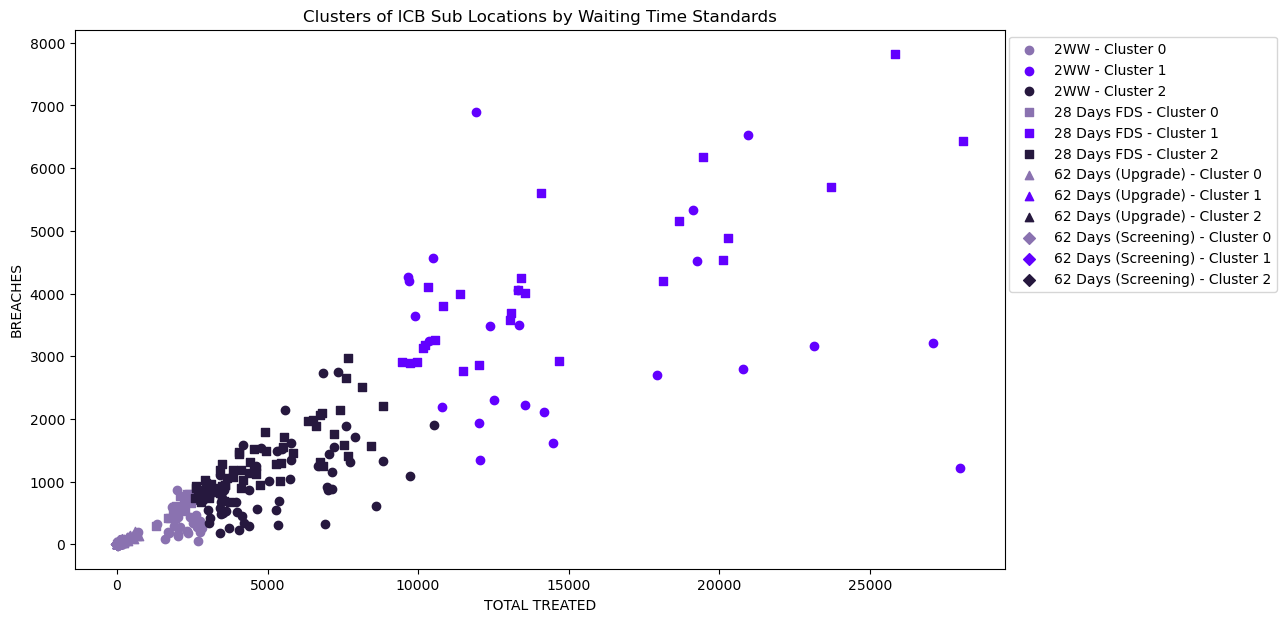

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming data is already loaded as 'data'

# Group by 'ICB SUB LOCATION ORG CODE' and 'STANDARD'
grouped_data = data.groupby(['ICB SUB LOCATION ORG CODE', 'STANDARD']).agg({
    'TOTAL TREATED': 'sum',
    'WITHIN STANDARD': 'sum',
    'BREACHES': 'sum'
}).reset_index()

# Extract columns for clustering and normalize
X = grouped_data[['TOTAL TREATED', 'WITHIN STANDARD', 'BREACHES']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
grouped_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Define shades of #8A72B0
shades = ['#8A72B0', '#6200FF', '#26183E']

# Define markers for each standard
markers = {
    '2WW': 'o',
    '28 Days FDS': 's',
    '62 Days (Upgrade)': '^',
    '62 Days (Screening)': 'D'
}

plt.figure(figsize=(12, 7))

# Plot each standard with a unique marker
for standard, marker in markers.items():
    filtered_data = grouped_data[grouped_data['STANDARD'] == standard]
    for i in range(3):
        plt.scatter(filtered_data[filtered_data['Cluster'] == i]['TOTAL TREATED'], 
                    filtered_data[filtered_data['Cluster'] == i]['BREACHES'], 
                    color=shades[i], 
                    marker=marker, 
                    label=f'{standard} - Cluster {i}')

plt.title('Clusters of ICB Sub Locations by Waiting Time Standards')
plt.xlabel('TOTAL TREATED')
plt.ylabel('BREACHES')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


      Period     YEAR MONTH           STANDARD ICB SUB LOCATION ORG CODE  \
0     JUN-23  2023/24   JUN                2WW                       91Q   
1     JUN-23  2023/24   JUN        28 Days FDS                     W2U3Z   
2     MAY-23  2023/24   MAY        28 Days FDS                     W2U3Z   
3     JUN-23  2023/24   JUN        28 Days FDS                       91Q   
4     JUN-23  2023/24   JUN                2WW                     W2U3Z   
...      ...      ...   ...                ...                       ...   
3312  JUN-23  2023/24   JUN  62 Days (Upgrade)                       14T   
3313  APR-23  2023/24   APR  62 Days (Upgrade)                       32T   
3314  JUN-23  2023/24   JUN  62 Days (Upgrade)                       32T   
3315  MAY-23  2023/24   MAY  62 Days (Upgrade)                       32T   
3316  APR-23  2023/24   APR  62 Days (Upgrade)                       97T   

      TOTAL TREATED  WITHIN STANDARD  BREACHES  Unnamed: 8  Unnamed: 9  \
0            

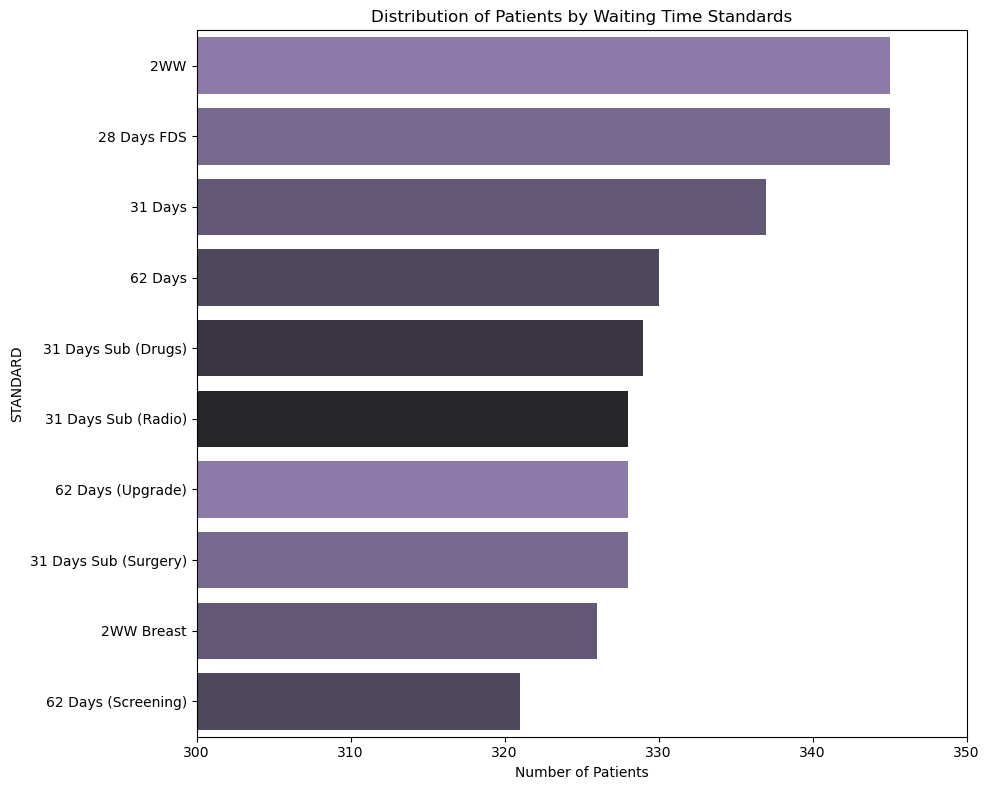

KeyError: 'Column not found: WAITING_TIME'

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the data
print(data1)

# Analyze the distribution of patients across different waiting time standards
plt.figure(figsize=(10, 8))
sns.countplot(data=data1, y='STANDARD', order=data1['STANDARD'].value_counts().index, palette=sns.dark_palette("#8A72B0", reverse=True))
plt.title('Distribution of Patients by Waiting Time Standards')
plt.xlabel('Number of Patients')
plt.xlim(300, 350)  # Set x-axis range
plt.tight_layout()
plt.show()

# Assuming there's a column 'WAITING_TIME' that records the actual waiting time for each patient
# If such a column doesn't exist, you'll need to derive it based on available data

# Filter out the breaches
breaches = data1[data1['BREACHES'] > 0]

# Calculate average waiting time for breaches by standard
avg_waiting_time = breaches.groupby('STANDARD')['WAITING_TIME'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
avg_waiting_time.plot(kind='barh', color='#8A72B0')
plt.title('Average Waiting Time for Breaches by Standard')
plt.xlabel('Average Waiting Time (days)')
plt.tight_layout()
plt.show()


      Period     YEAR MONTH           STANDARD ICB SUB LOCATION ORG CODE  \
0     JUN-23  2023/24   JUN                2WW                       91Q   
1     JUN-23  2023/24   JUN        28 Days FDS                     W2U3Z   
2     MAY-23  2023/24   MAY        28 Days FDS                     W2U3Z   
3     JUN-23  2023/24   JUN        28 Days FDS                       91Q   
4     JUN-23  2023/24   JUN                2WW                     W2U3Z   
...      ...      ...   ...                ...                       ...   
3312  JUN-23  2023/24   JUN  62 Days (Upgrade)                       14T   
3313  APR-23  2023/24   APR  62 Days (Upgrade)                       32T   
3314  JUN-23  2023/24   JUN  62 Days (Upgrade)                       32T   
3315  MAY-23  2023/24   MAY  62 Days (Upgrade)                       32T   
3316  APR-23  2023/24   APR  62 Days (Upgrade)                       97T   

      TOTAL TREATED  WITHIN STANDARD  BREACHES  Unnamed: 8  Unnamed: 9  \
0            

TypeError: Cannot index by location index with a non-integer key

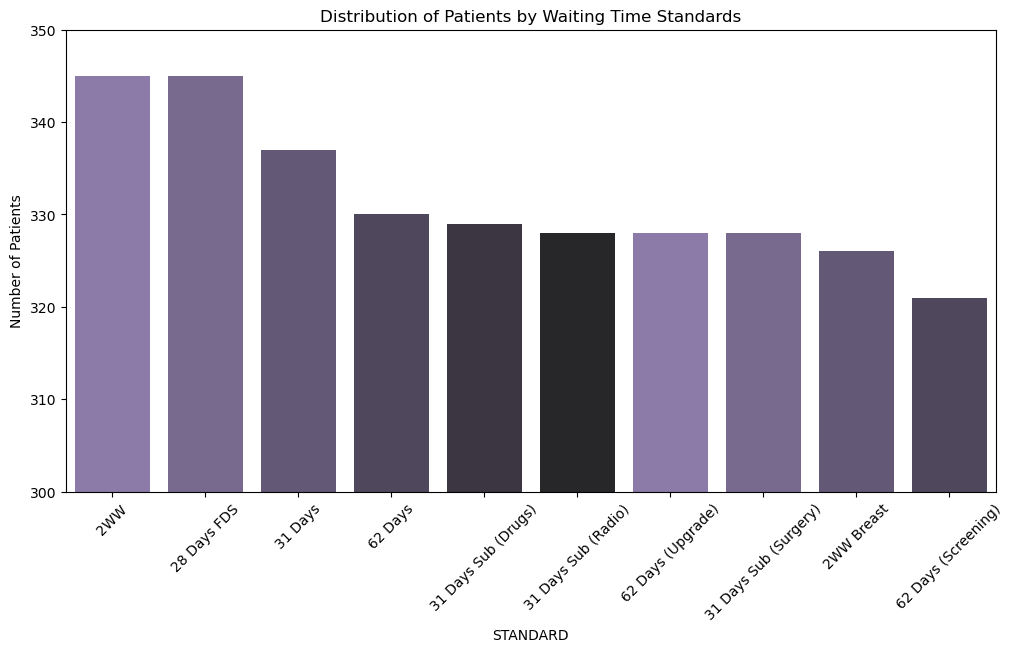

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the data
print(data1)

# Calculate compliance rate for each standard
data1['Compliance Rate'] = data1['WITHIN STANDARD'] / data1['TOTAL TREATED'] * 100

# Analyze the distribution of patients across different waiting time standards
plt.figure(figsize=(12, 6))
bars = sns.countplot(data=data1, x='STANDARD', order=data1['STANDARD'].value_counts().index, palette=sns.dark_palette("#8A72B0", reverse=True))
plt.title('Distribution of Patients by Waiting Time Standards')
plt.ylabel('Number of Patients')
plt.ylim(300, 350)  # Set y-axis range
plt.xticks(rotation=45)

# Add compliance rate as text on top of each bar
for p in bars.patches:
    height = p.get_height()
    bars.text(p.get_x() + p.get_width()/2., height + 5, '{:1.2f}%'.format(data1['Compliance Rate'].iloc[p.get_x()]), ha="center")

plt.tight_layout()
plt.show()

# Assuming there's a column 'WAITING_TIME' that records the actual waiting time for each patient
# If such a column doesn't exist, you'll need to derive it based on available data

# Filter out the breaches
breaches = data1[data1['BREACHES'] > 0]

# Calculate average waiting time for breaches by standard
avg_waiting_time = breaches.groupby('STANDARD')['WAITING_TIME'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
avg_waiting_time.plot(kind='bar', color='#8A72B0')
plt.title('Average Waiting Time for Breaches by Standard')
plt.ylabel('Average Waiting Time (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


      Period     YEAR MONTH           STANDARD ICB SUB LOCATION ORG CODE  \
0     JUN-23  2023/24   JUN                2WW                       91Q   
1     JUN-23  2023/24   JUN        28 Days FDS                     W2U3Z   
2     MAY-23  2023/24   MAY        28 Days FDS                     W2U3Z   
3     JUN-23  2023/24   JUN        28 Days FDS                       91Q   
4     JUN-23  2023/24   JUN                2WW                     W2U3Z   
...      ...      ...   ...                ...                       ...   
3312  JUN-23  2023/24   JUN  62 Days (Upgrade)                       14T   
3313  APR-23  2023/24   APR  62 Days (Upgrade)                       32T   
3314  JUN-23  2023/24   JUN  62 Days (Upgrade)                       32T   
3315  MAY-23  2023/24   MAY  62 Days (Upgrade)                       32T   
3316  APR-23  2023/24   APR  62 Days (Upgrade)                       97T   

      TOTAL TREATED  WITHIN STANDARD  BREACHES  Unnamed: 8  Unnamed: 9  \
0            

<Figure size 1200x600 with 0 Axes>

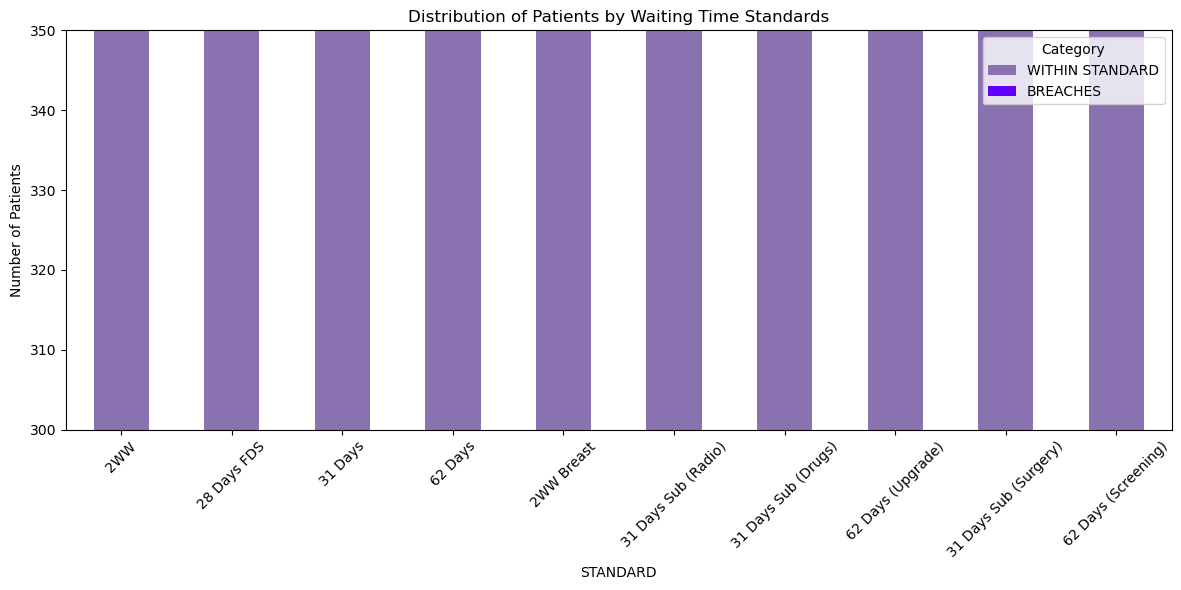

KeyError: 'Column not found: WAITING_TIME'

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Print the data
print(data1)

# Group by 'STANDARD' and sum the columns of interest
grouped_data = data1.groupby('STANDARD').agg({
    'TOTAL TREATED': 'sum',
    'WITHIN STANDARD': 'sum',
    'BREACHES': 'sum'
}).reset_index()

# Sort the data by 'TOTAL TREATED'
grouped_data = grouped_data.sort_values(by='TOTAL TREATED', ascending=False)

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
grouped_data.plot(x='STANDARD', y=['WITHIN STANDARD', 'BREACHES'], kind='bar', stacked=True, color=['#8A72B0', '#6200FF'], figsize=(12, 6))
plt.title('Distribution of Patients by Waiting Time Standards')
plt.ylabel('Number of Patients')
plt.ylim(300, 350)  # Set y-axis range
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Category')
plt.show()

# Assuming there's a column 'WAITING_TIME' that records the actual waiting time for each patient
# If such a column doesn't exist, you'll need to derive it based on available data

# Filter out the breaches
breaches = data1[data1['BREACHES'] > 0]

# Calculate average waiting time for breaches by standard
avg_waiting_time = breaches.groupby('STANDARD')['WAITING_TIME'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
avg_waiting_time.plot(kind='bar', color='#8A72B0')
plt.title('Average Waiting Time for Breaches by Standard')
plt.ylabel('Average Waiting Time (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Breaches in:
APR 2023: 124151
MAY 2023: 134687
JUN 2023: 136186


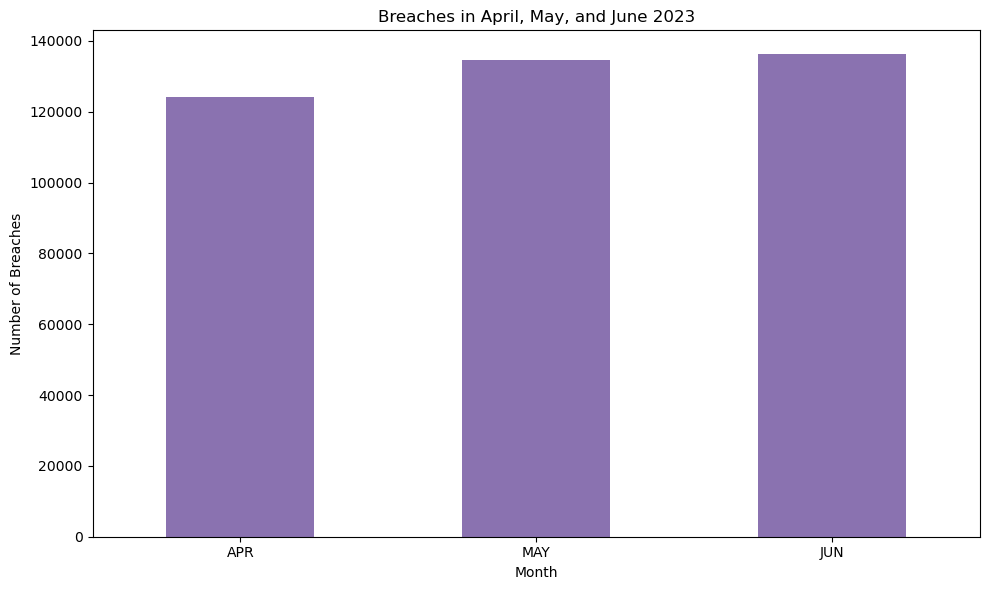

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is loaded into a DataFrame named 'data1'

# Filter data for the months of April, May, and June 2023
months_data = data1[data1['MONTH'].isin(['APR', 'MAY', 'JUN']) & (data1['YEAR'] == '2023/24')]

# Group by month and sum the breaches
breaches_by_month = months_data.groupby('MONTH')['BREACHES'].sum().reindex(['APR', 'MAY', 'JUN'])

# Print the results
print("Breaches in:")
for month, breaches in breaches_by_month.items():
    print(f"{month} 2023: {breaches}")

# Plot the data
plt.figure(figsize=(10, 6))
breaches_by_month.plot(kind='bar', color='#8A72B0')
plt.title('Breaches in April, May, and June 2023')
plt.xlabel('Month')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Total Patients Treated in:
APR 2023: 505227
MAY 2023: 576244
JUN 2023: 607500


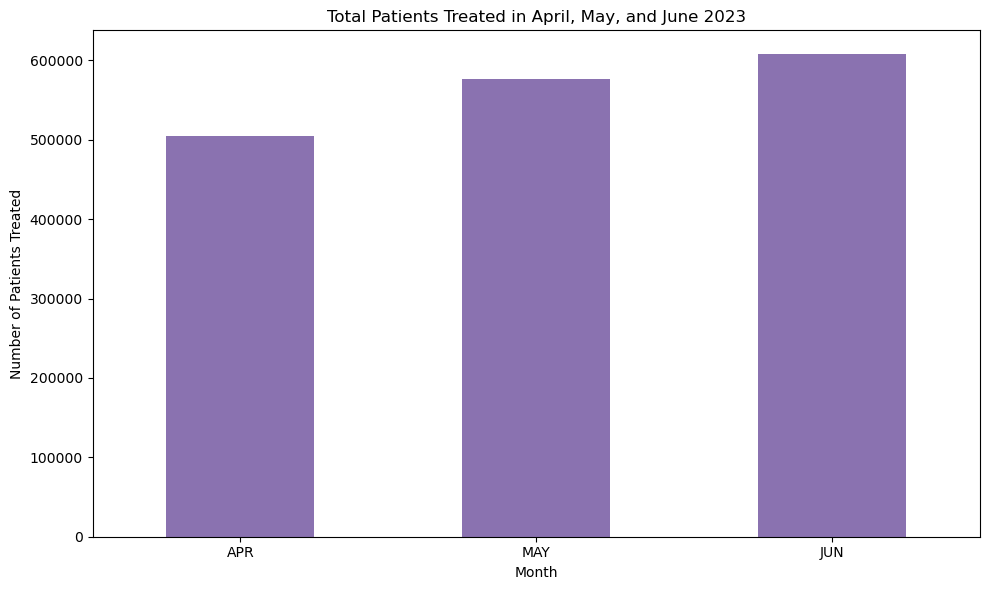

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is loaded into a DataFrame named 'data1'

# Filter data for the months of April, May, and June 2023
months_data = data1[data1['MONTH'].isin(['APR', 'MAY', 'JUN']) & (data1['YEAR'] == '2023/24')]

# Group by month and sum the total treated
treated_by_month = months_data.groupby('MONTH')['TOTAL TREATED'].sum().reindex(['APR', 'MAY', 'JUN'])

# Print the results
print("Total Patients Treated in:")
for month, total in treated_by_month.items():
    print(f"{month} 2023: {total}")

# Plot the data
plt.figure(figsize=(10, 6))
treated_by_month.plot(kind='bar', color='#8A72B0')
plt.title('Total Patients Treated in April, May, and June 2023')
plt.xlabel('Month')
plt.ylabel('Number of Patients Treated')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




Breaches in:
APR 2023: 124151
MAY 2023: 134687
JUN 2023: 136186

Total Patients Treated in:
APR 2023: 505227
MAY 2023: 576244
JUN 2023: 607500


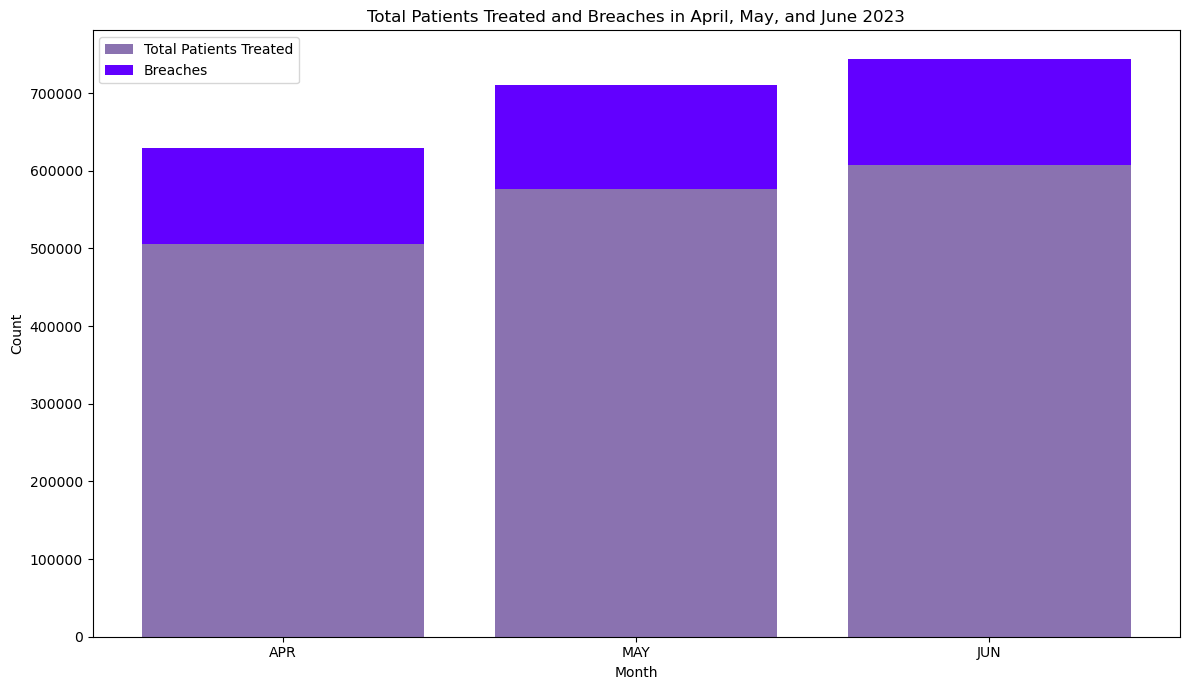

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is loaded into a DataFrame named 'data1'

# Filter data for the months of April, May, and June 2023
months_data = data1[data1['MONTH'].isin(['APR', 'MAY', 'JUN']) & (data1['YEAR'] == '2023/24')]

# Group by month and sum the breaches
breaches_by_month = months_data.groupby('MONTH')['BREACHES'].sum().reindex(['APR', 'MAY', 'JUN'])

# Group by month and sum the total treated
treated_by_month = months_data.groupby('MONTH')['TOTAL TREATED'].sum().reindex(['APR', 'MAY', 'JUN'])

# Print the results
print("Breaches in:")
for month, breaches in breaches_by_month.items():
    print(f"{month} 2023: {breaches}")

print("\nTotal Patients Treated in:")
for month, total in treated_by_month.items():
    print(f"{month} 2023: {total}")

# Plot the data
plt.figure(figsize=(12, 7))

# Plot total treated
plt.bar(treated_by_month.index, treated_by_month.values, color='#8A72B0', label='Total Patients Treated')

# Plot breaches on top
plt.bar(breaches_by_month.index, breaches_by_month.values, color='#6200FF', label='Breaches', bottom=treated_by_month.values)

plt.title('Total Patients Treated and Breaches in April, May, and June 2023')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


Breaches in:
APR 2023: 124151
MAY 2023: 134687
JUN 2023: 136186


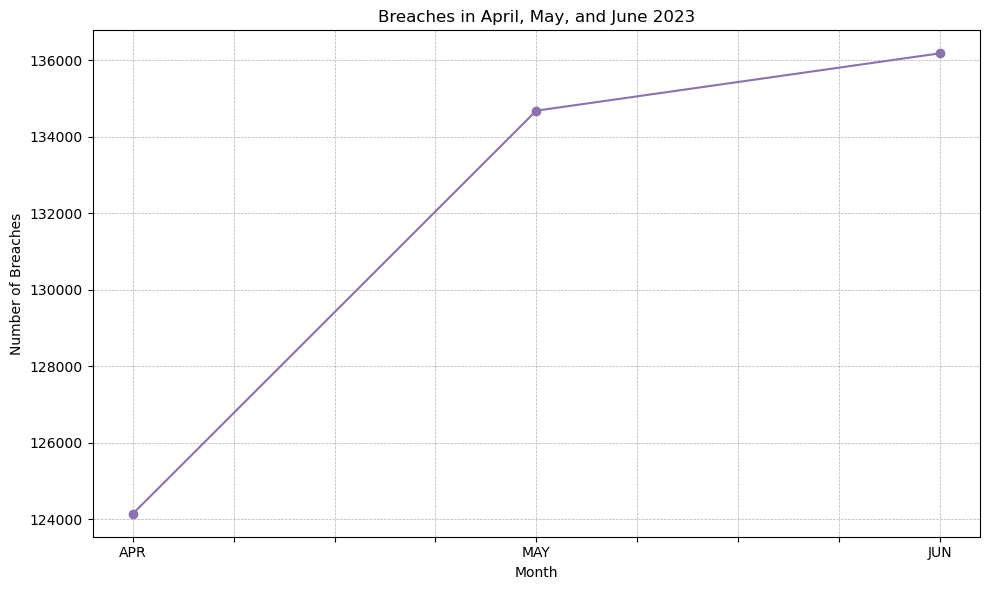

Total Patients Treated in:
APR 2023: 505227
MAY 2023: 576244
JUN 2023: 607500


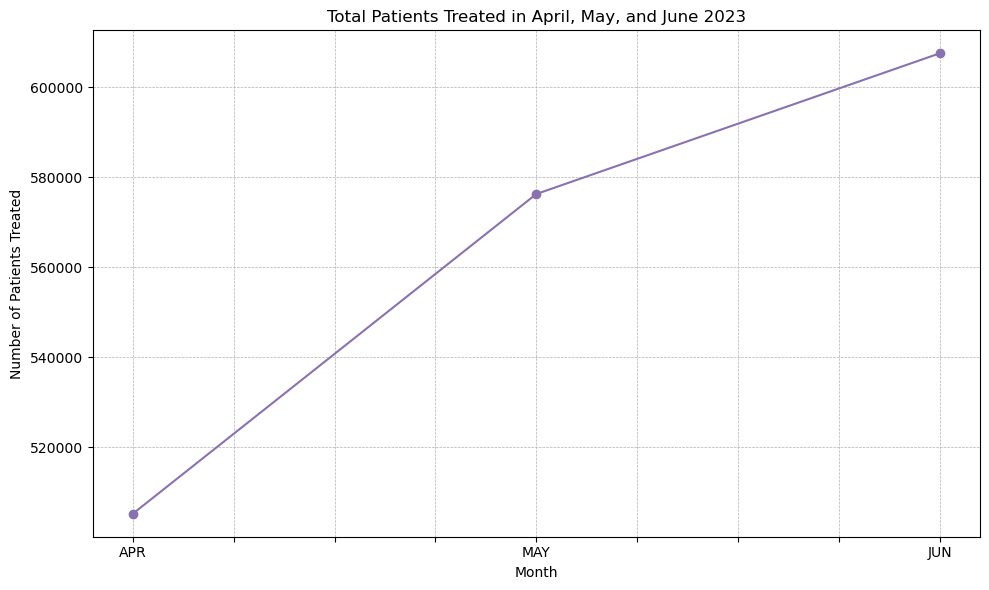

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is loaded into a DataFrame named 'data1'

# Filter data for the months of April, May, and June 2023
months_data = data1[data1['MONTH'].isin(['APR', 'MAY', 'JUN']) & (data1['YEAR'] == '2023/24')]

# Group by month and sum the breaches
breaches_by_month = months_data.groupby('MONTH')['BREACHES'].sum().reindex(['APR', 'MAY', 'JUN'])

# Print the results
print("Breaches in:")
for month, breaches in breaches_by_month.items():
    print(f"{month} 2023: {breaches}")

# Plot the breaches using a line graph
plt.figure(figsize=(10, 6))
breaches_by_month.plot(kind='line', marker='o', color='#8A72B0')
plt.title('Breaches in April, May, and June 2023')
plt.xlabel('Month')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Group by month and sum the total treated
treated_by_month = months_data.groupby('MONTH')['TOTAL TREATED'].sum().reindex(['APR', 'MAY', 'JUN'])

# Print the results
print("Total Patients Treated in:")
for month, total in treated_by_month.items():
    print(f"{month} 2023: {total}")

# Plot the total patients treated using a line graph
plt.figure(figsize=(10, 6))
treated_by_month.plot(kind='line', marker='o', color='#8A72B0')
plt.title('Total Patients Treated in April, May, and June 2023')
plt.xlabel('Month')
plt.ylabel('Number of Patients Treated')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



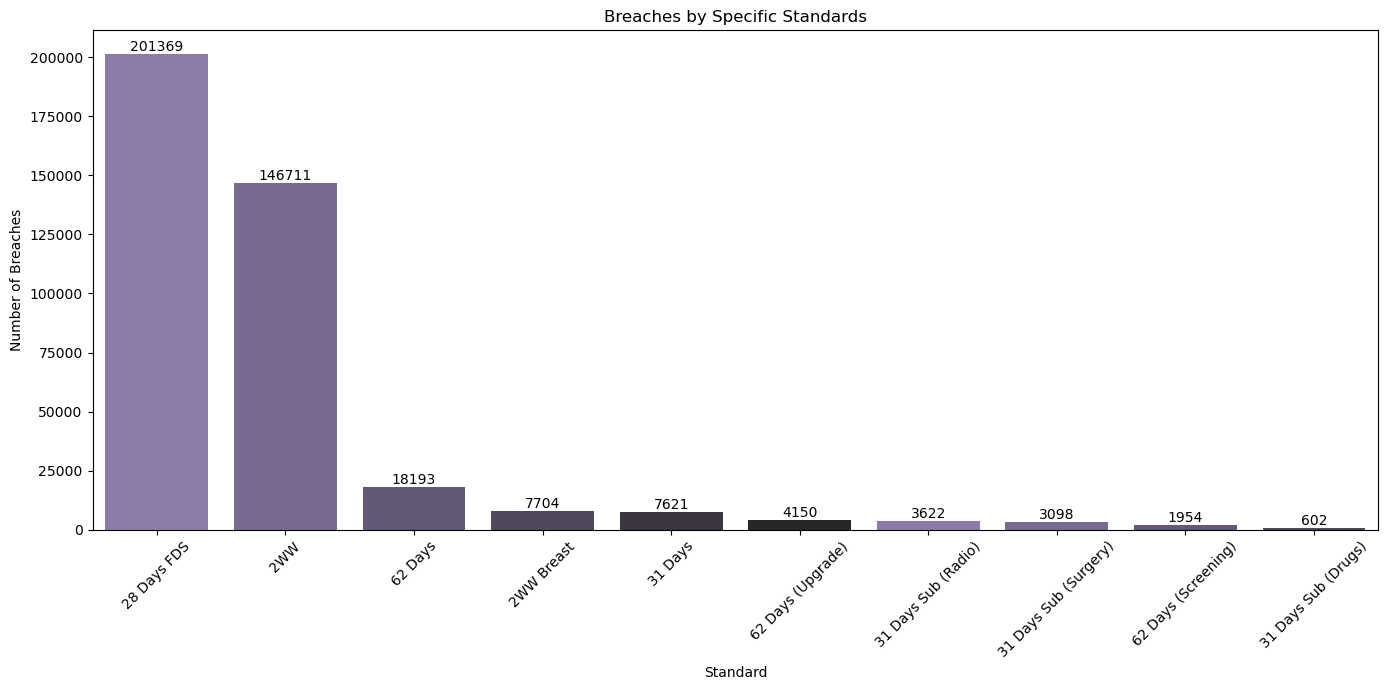

Breaches by Specific Standards:
28 Days FDS: 201369
2WW: 146711
62 Days: 18193
2WW Breast: 7704
31 Days: 7621
62 Days (Upgrade): 4150
31 Days Sub (Radio): 3622
31 Days Sub (Surgery): 3098
62 Days (Screening): 1954
31 Days Sub (Drugs): 602


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is loaded into a DataFrame named 'data1'

# Identify all unique standards in the dataset
all_standards = data1['STANDARD'].unique()

# Filter data for the specific standards
specific_data = data1[data1['STANDARD'].isin(all_standards)]

# Group by standard and sum the breaches
breaches_by_standard = specific_data.groupby('STANDARD')['BREACHES'].sum().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=breaches_by_standard.index, y=breaches_by_standard.values, palette=sns.dark_palette("#8A72B0", reverse=True))
plt.title('Breaches by Specific Standards')
plt.xlabel('Standard')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=45)

# Add individual figures above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Print the results
print("Breaches by Specific Standards:")
for standard, breaches in breaches_by_standard.items():
    print(f"{standard}: {breaches}")



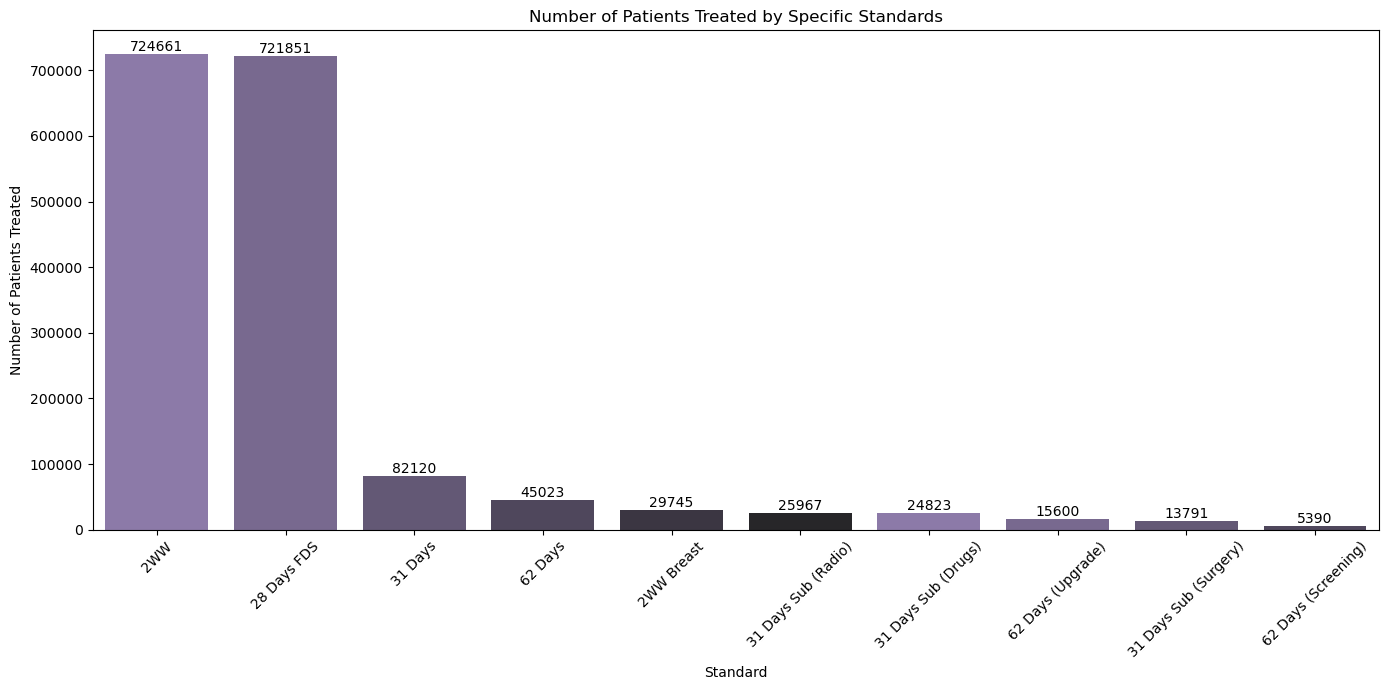

Number of Patients Treated by Specific Standards:
2WW: 724661
28 Days FDS: 721851
31 Days: 82120
62 Days: 45023
2WW Breast: 29745
31 Days Sub (Radio): 25967
31 Days Sub (Drugs): 24823
62 Days (Upgrade): 15600
31 Days Sub (Surgery): 13791
62 Days (Screening): 5390


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is loaded into a DataFrame named 'data1'

# Group by standard and sum the total treated
patients_by_standard = data1.groupby('STANDARD')['TOTAL TREATED'].sum().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=patients_by_standard.index, y=patients_by_standard.values, palette=sns.dark_palette("#8A72B0", reverse=True))
plt.title('Number of Patients Treated by Specific Standards')
plt.xlabel('Standard')
plt.ylabel('Number of Patients Treated')
plt.xticks(rotation=45)

# Add individual figures next to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Print the results
print("Number of Patients Treated by Specific Standards:")
for standard, total in patients_by_standard.items():
    print(f"{standard}: {total}")


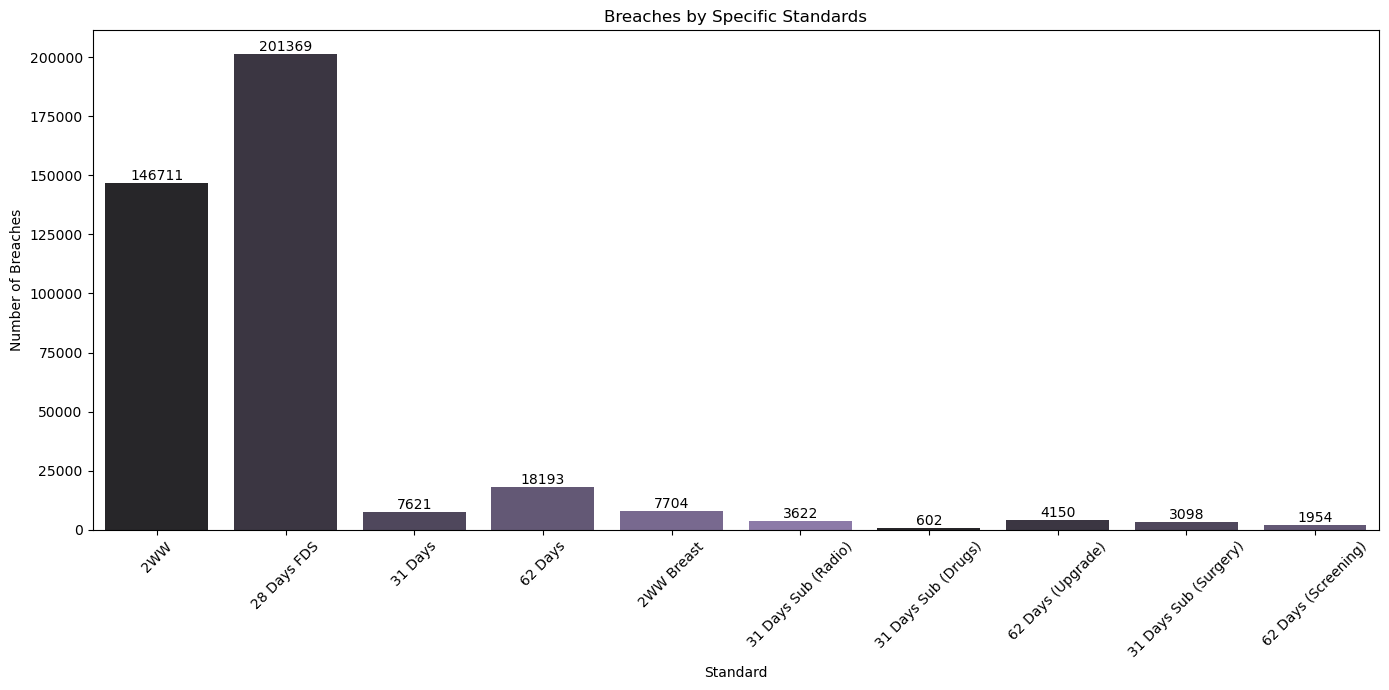

Breaches by Specific Standards:
2WW: 146711
28 Days FDS: 201369
31 Days: 7621
62 Days: 18193
2WW Breast: 7704
31 Days Sub (Radio): 3622
31 Days Sub (Drugs): 602
62 Days (Upgrade): 4150
31 Days Sub (Surgery): 3098
62 Days (Screening): 1954


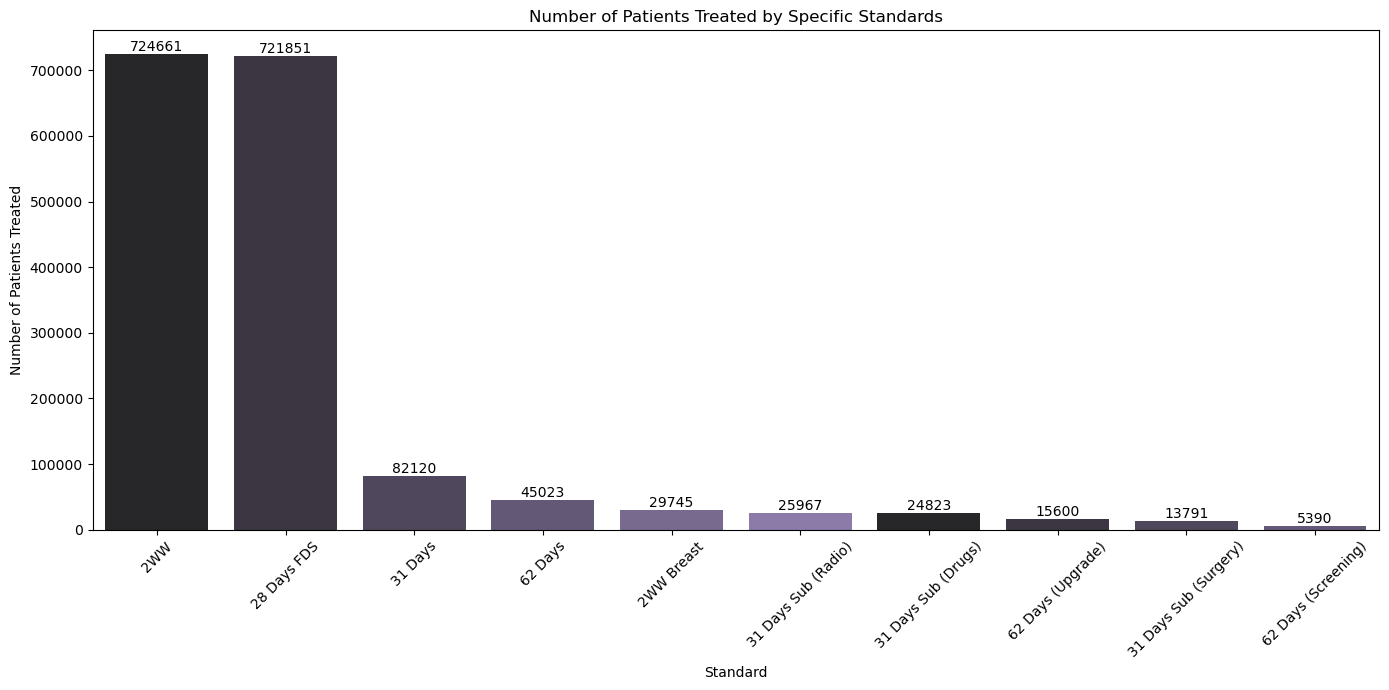


Number of Patients Treated by Specific Standards:
2WW: 724661
28 Days FDS: 721851
31 Days: 82120
62 Days: 45023
2WW Breast: 29745
31 Days Sub (Radio): 25967
31 Days Sub (Drugs): 24823
62 Days (Upgrade): 15600
31 Days Sub (Surgery): 13791
62 Days (Screening): 5390


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is loaded into a DataFrame named 'data1'

# Determine the order of standards based on the total number of patients treated
order_of_standards = data1.groupby('STANDARD')['TOTAL TREATED'].sum().sort_values(ascending=False).index

# Group by standard and sum the breaches
breaches_by_standard = data1.groupby('STANDARD')['BREACHES'].sum()

# Plot the breaches by specific standards
plt.figure(figsize=(14, 7))
ax1 = sns.barplot(x=breaches_by_standard.index, y=breaches_by_standard.values, order=order_of_standards, palette=sns.dark_palette("#8A72B0"))
plt.title('Breaches by Specific Standards')
plt.xlabel('Standard')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=45)

# Add individual figures above each bar
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Print the breaches by specific standards
print("Breaches by Specific Standards:")
for standard in order_of_standards:
    print(f"{standard}: {breaches_by_standard[standard]}")

# Group by standard and sum the total treated
patients_by_standard = data1.groupby('STANDARD')['TOTAL TREATED'].sum()

# Plot the number of patients treated by specific standards
plt.figure(figsize=(14, 7))
ax2 = sns.barplot(x=patients_by_standard.index, y=patients_by_standard.values, order=order_of_standards, palette=sns.dark_palette("#8A72B0"))
plt.title('Number of Patients Treated by Specific Standards')
plt.xlabel('Standard')
plt.ylabel('Number of Patients Treated')
plt.xticks(rotation=45)

# Add individual figures next to each bar
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Print the number of patients treated by specific standards
print("\nNumber of Patients Treated by Specific Standards:")
for standard in order_of_standards:
    print(f"{standard}: {patients_by_standard[standard]}")


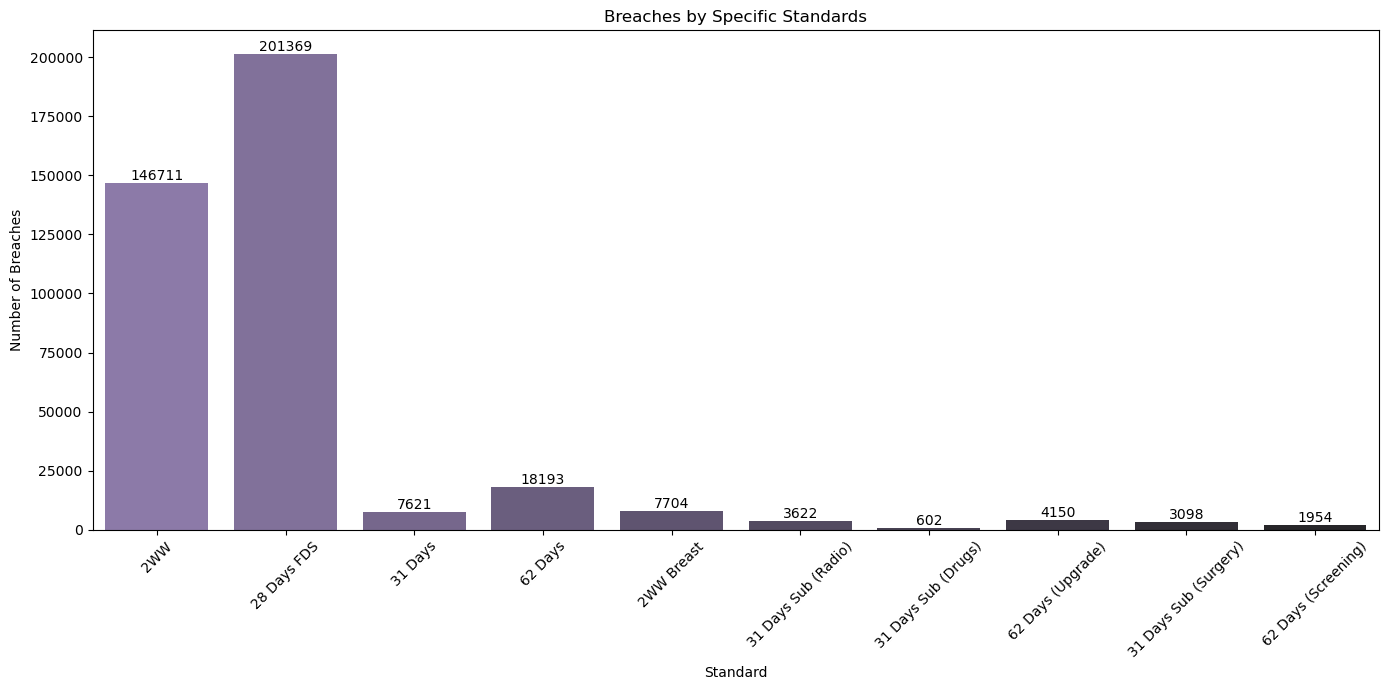

Breaches by Specific Standards:
2WW: 146711
28 Days FDS: 201369
31 Days: 7621
62 Days: 18193
2WW Breast: 7704
31 Days Sub (Radio): 3622
31 Days Sub (Drugs): 602
62 Days (Upgrade): 4150
31 Days Sub (Surgery): 3098
62 Days (Screening): 1954


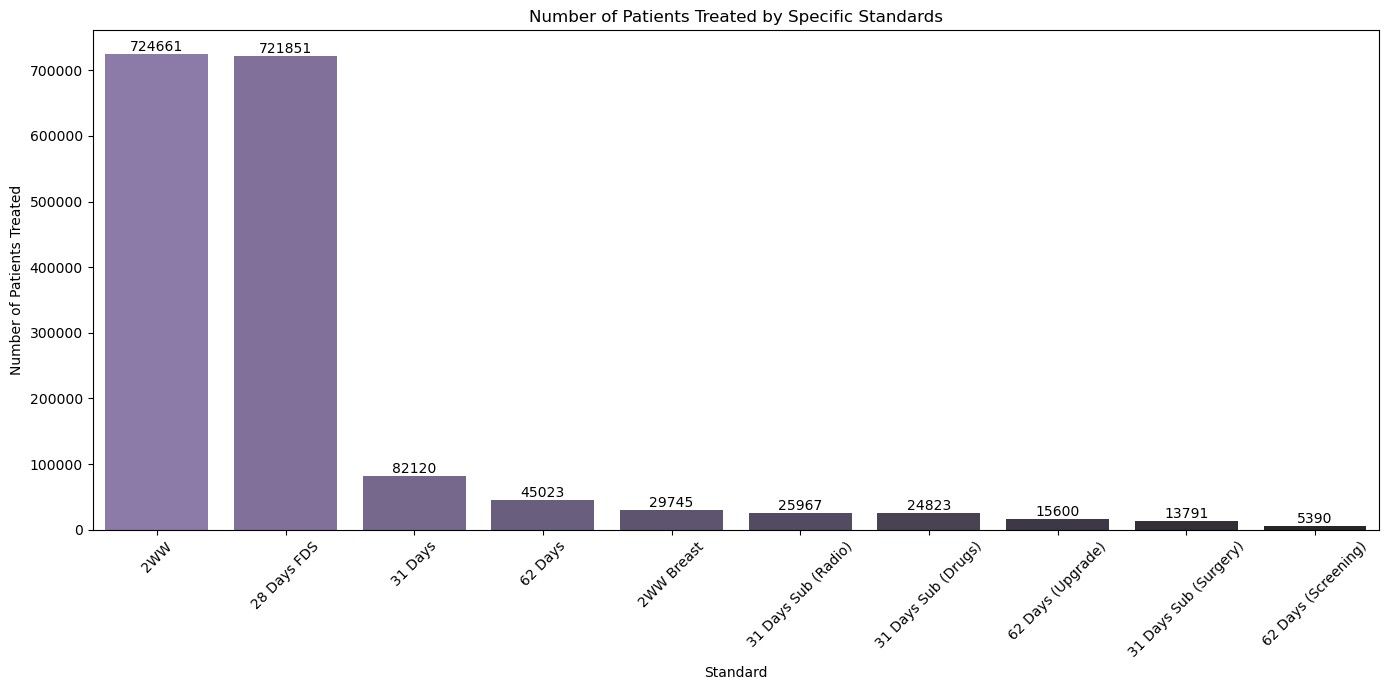


Number of Patients Treated by Specific Standards:
2WW: 724661
28 Days FDS: 721851
31 Days: 82120
62 Days: 45023
2WW Breast: 29745
31 Days Sub (Radio): 25967
31 Days Sub (Drugs): 24823
62 Days (Upgrade): 15600
31 Days Sub (Surgery): 13791
62 Days (Screening): 5390


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is loaded into a DataFrame named 'data1'

# Determine the order of standards based on the total number of patients treated
order_of_standards = data1.groupby('STANDARD')['TOTAL TREATED'].sum().sort_values(ascending=False).index

# Generate a color palette starting with #8A72B0 and reverse the order
colors = sns.dark_palette("#8A72B0", n_colors=len(order_of_standards), reverse=True)

# Group by standard and sum the breaches
breaches_by_standard = data1.groupby('STANDARD')['BREACHES'].sum()

# Plot the breaches by specific standards
plt.figure(figsize=(14, 7))
ax1 = sns.barplot(x=breaches_by_standard.index, y=breaches_by_standard.values, order=order_of_standards, palette=colors)
plt.title('Breaches by Specific Standards')
plt.xlabel('Standard')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=45)

# Add individual figures above each bar
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Print the breaches by specific standards
print("Breaches by Specific Standards:")
for standard in order_of_standards:
    print(f"{standard}: {breaches_by_standard[standard]}")

# Group by standard and sum the total treated
patients_by_standard = data1.groupby('STANDARD')['TOTAL TREATED'].sum()

# Plot the number of patients treated by specific standards
plt.figure(figsize=(14, 7))
ax2 = sns.barplot(x=patients_by_standard.index, y=patients_by_standard.values, order=order_of_standards, palette=colors)
plt.title('Number of Patients Treated by Specific Standards')
plt.xlabel('Standard')
plt.ylabel('Number of Patients Treated')
plt.xticks(rotation=45)

# Add individual figures next to each bar
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Print the number of patients treated by specific standards
print("\nNumber of Patients Treated by Specific Standards:")
for standard in order_of_standards:
    print(f"{standard}: {patients_by_standard[standard]}")

